# Exploratory Data Analysis (EDA)

This notebook contains exploratory data analysis for the credit scoring model.

**Note**: This notebook is for exploration only; it is not for production code.


## 1. Overview of the Data

Understanding the structure of the dataset, including the number of rows, columns, and data types.


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Set style and display options
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")


Libraries imported successfully!


In [4]:
# Load the dataset
data_path = Path("../data/raw/data.csv")
df = pd.read_csv(data_path)

print("Dataset loaded successfully!")
print(f"\nDataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")


Dataset loaded successfully!

Dataset shape: (95662, 16)
Number of rows: 95,662
Number of columns: 16


In [5]:
# Display basic information about the dataset
print("=" * 100)
print("DATASET OVERVIEW")
print("=" * 100)

print("\n1. Dataset Dimensions:")
print(f"   - Rows: {df.shape[0]:,}")
print(f"   - Columns: {df.shape[1]}")

print("\n2. Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2d}. {col}")

print("\n3. Data Types:")
print(df.dtypes)

print("\n4. Memory Usage:")
print(f"   Total memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


DATASET OVERVIEW

1. Dataset Dimensions:
   - Rows: 95,662
   - Columns: 16

2. Column Names:
    1. TransactionId
    2. BatchId
    3. AccountId
    4. SubscriptionId
    5. CustomerId
    6. CurrencyCode
    7. CountryCode
    8. ProviderId
    9. ProductId
   10. ProductCategory
   11. ChannelId
   12. Amount
   13. Value
   14. TransactionStartTime
   15. PricingStrategy
   16. FraudResult

3. Data Types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

4. Memory Usage:
   Total memory usage: 66.48 MB


In [6]:
# Display first few rows
print("=" * 100)
print("FIRST 5 ROWS")
print("=" * 100)
df.head()


FIRST 5 ROWS


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [8]:
# Summary statistics for numerical columns
print("=" * 100)
print("SUMMARY STATISTICS - NUMERICAL COLUMNS")
print("=" * 100)
df.describe()


SUMMARY STATISTICS - NUMERICAL COLUMNS


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [9]:
# Summary statistics for categorical columns
print("=" * 100)
print("SUMMARY STATISTICS - CATEGORICAL COLUMNS")
print("=" * 100)

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Most frequent values:")
    print(df[col].value_counts().head(10))
    print("-" * 100)


SUMMARY STATISTICS - CATEGORICAL COLUMNS

TransactionId:
  Unique values: 95662
  Most frequent values:
TransactionId
TransactionId_76871     1
TransactionId_73770     1
TransactionId_26203     1
TransactionId_380       1
TransactionId_28195     1
TransactionId_23223     1
TransactionId_118063    1
TransactionId_100640    1
TransactionId_51905     1
TransactionId_130161    1
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------

BatchId:
  Unique values: 94809
  Most frequent values:
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
BatchId_88001      9
BatchId_110084     7
BatchId_49408      7
BatchId_4233       6
BatchId_66085      6
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------

AccountId:
  Unique values: 3633
  Most frequent values:
AccountId
AccountId_4841    30893
A

In [10]:
# Data type breakdown
print("=" * 80)
print("DATA TYPE BREAKDOWN")
print("=" * 80)

data_types = df.dtypes.value_counts()
print("\nData type distribution:")
for dtype, count in data_types.items():
    print(f"  {dtype}: {count} column(s)")

print("\nColumns by data type:")
print("\n====== Object (String) Columns ======")
object_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in object_cols:
    print(f"  - {col}")

print("\n====== Numeric Columns ======")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    print(f"  - {col}")

print("\n====== Integer Columns ======")
int_cols = df.select_dtypes(include=['int64']).columns.tolist()
for col in int_cols:
    print(f"  - {col}")

print("\n====== Float Columns ======")
float_cols = df.select_dtypes(include=['float64']).columns.tolist()
for col in float_cols:
    print(f"  - {col}")


DATA TYPE BREAKDOWN

Data type distribution:
  object: 11 column(s)
  int64: 4 column(s)
  float64: 1 column(s)

Columns by data type:

====== Object (String) Columns ======
  - TransactionId
  - BatchId
  - AccountId
  - SubscriptionId
  - CustomerId
  - CurrencyCode
  - ProviderId
  - ProductId
  - ProductCategory
  - ChannelId
  - TransactionStartTime

====== Numeric Columns ======
  - CountryCode
  - Amount
  - Value
  - PricingStrategy
  - FraudResult

====== Integer Columns ======
  - CountryCode
  - Value
  - PricingStrategy
  - FraudResult

====== Float Columns ======
  - Amount


In [ ]:
# Missing values analysis moved to Section 5: Identifying Missing Values


MISSING VALUES ANALYSIS

✓ No missing values found in the dataset!

Total missing values: 0
Percentage of missing data: 0.00%


In [11]:
# Check for duplicate rows
print("=" * 80)
print("DUPLICATE ROWS ANALYSIS")
print("=" * 80)

duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count:,}")
print(f"Percentage of duplicate rows: {(duplicate_count / len(df)) * 100:.2f}%")

if duplicate_count > 0:
    print("\nSample duplicate rows:")
    print(df[df.duplicated(keep=False)].head(10))
else:
    print("\n✓ No duplicate rows found!")


DUPLICATE ROWS ANALYSIS
Number of duplicate rows: 0
Percentage of duplicate rows: 0.00%

✓ No duplicate rows found!


In [12]:
# Check date/time column if present
print("=" * 100)
print("TEMPORAL DATA ANALYSIS")
print("=" * 100)

if 'TransactionStartTime' in df.columns:
    # Convert to datetime
    df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
    
    print(f"Date range:")
    print(f"  Start: {df['TransactionStartTime'].min()}")
    print(f"  End: {df['TransactionStartTime'].max()}")
    print(f"  Span: {(df['TransactionStartTime'].max() - df['TransactionStartTime'].min()).days} days")
    
    print(f"\nTransactions by year:")
    print(df['TransactionStartTime'].dt.year.value_counts().sort_index())
    
    print(f"\nTransactions by month:")
    print(df['TransactionStartTime'].dt.to_period('M').value_counts().sort_index().head(12))
else:
    print("No temporal column found.")


TEMPORAL DATA ANALYSIS
Date range:
  Start: 2018-11-15 02:18:49+00:00
  End: 2019-02-13 10:01:28+00:00
  Span: 90 days

Transactions by year:
TransactionStartTime
2018    48107
2019    47555
Name: count, dtype: int64

Transactions by month:
TransactionStartTime
2018-11    12472
2018-12    35635
2019-01    31783
2019-02    15772
Freq: M, Name: count, dtype: int64


## Summary of Dataset Structure

Based on the analysis above, we can summarize:

- **Total Rows**: [Will be displayed after running]
- **Total Columns**: [Will be displayed after running]
- **Data Types**: [Will be displayed after running]
- **Missing Values**: [Will be displayed after running]
- **Key Observations**: [To be filled after analysis]


## 2. Summary Statistics

Understanding the central tendency, dispersion, and shape of the dataset's distribution.


In [13]:
# Get numerical columns for statistical analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("=" * 100)
print("NUMERICAL COLUMNS FOR STATISTICAL ANALYSIS")
print("=" * 100)
print(f"Numerical columns: {numeric_cols}")
print(f"Total numerical columns: {len(numeric_cols)}")


NUMERICAL COLUMNS FOR STATISTICAL ANALYSIS
Numerical columns: ['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']
Total numerical columns: 5


In [14]:
# Comprehensive summary statistics
print("=" * 100)
print("COMPREHENSIVE SUMMARY STATISTICS")
print("=" * 100)

summary_stats = df[numeric_cols].describe()
print(summary_stats)


COMPREHENSIVE SUMMARY STATISTICS
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


In [15]:
# Central Tendency Measures
print("=" * 100)
print("CENTRAL TENDENCY MEASURES")
print("=" * 100)

central_tendency = pd.DataFrame({
    'Mean': df[numeric_cols].mean(),
    'Median': df[numeric_cols].median(),
    'Mode': [df[col].mode()[0] if len(df[col].mode()) > 0 else np.nan for col in numeric_cols]
})

central_tendency.index.name = 'Variable'
print(central_tendency)


CENTRAL TENDENCY MEASURES
                        Mean  Median    Mode
Variable                                    
CountryCode       256.000000   256.0   256.0
Amount           6717.846433  1000.0  1000.0
Value            9900.583941  1000.0  1000.0
PricingStrategy     2.255974     2.0     2.0
FraudResult         0.002018     0.0     0.0


In [16]:
# Dispersion Measures
print("=" * 100)
print("DISPERSION MEASURES")
print("=" * 100)

dispersion = pd.DataFrame({
    'Std Dev': df[numeric_cols].std(),
    'Variance': df[numeric_cols].var(),
    'Min': df[numeric_cols].min(),
    'Max': df[numeric_cols].max(),
    'Range': df[numeric_cols].max() - df[numeric_cols].min(),
    'IQR': df[numeric_cols].quantile(0.75) - df[numeric_cols].quantile(0.25),
    'Q1 (25%)': df[numeric_cols].quantile(0.25),
    'Q3 (75%)': df[numeric_cols].quantile(0.75)
})

dispersion.index.name = 'Variable'
print(dispersion)


DISPERSION MEASURES
                       Std Dev      Variance        Min        Max  \
Variable                                                             
CountryCode           0.000000  0.000000e+00      256.0      256.0   
Amount           123306.797164  1.520457e+10 -1000000.0  9880000.0   
Value            123122.087776  1.515905e+10        2.0  9880000.0   
PricingStrategy       0.732924  5.371778e-01        0.0        4.0   
FraudResult           0.044872  2.013471e-03        0.0        1.0   

                      Range     IQR  Q1 (25%)  Q3 (75%)  
Variable                                                 
CountryCode             0.0     0.0     256.0     256.0  
Amount           10880000.0  2850.0     -50.0    2800.0  
Value             9879998.0  4725.0     275.0    5000.0  
PricingStrategy         4.0     0.0       2.0       2.0  
FraudResult             1.0     0.0       0.0       0.0  


In [17]:
# Shape of Distribution (Skewness and Kurtosis)
print("=" * 100)
print("SHAPE OF DISTRIBUTION")
print("=" * 100)

from scipy import stats

shape_measures = pd.DataFrame({
    'Skewness': [stats.skew(df[col].dropna()) for col in numeric_cols],
    'Kurtosis': [stats.kurtosis(df[col].dropna()) for col in numeric_cols]
}, index=numeric_cols)

shape_measures.index.name = 'Variable'

# Interpretation helper
def interpret_skewness(skew):
    if abs(skew) < 0.5:
        return "Approximately symmetric"
    elif abs(skew) < 1:
        return "Moderately skewed"
    else:
        return "Highly skewed"

def interpret_kurtosis(kurt):
    if kurt < -0.5:
        return "Light-tailed (platykurtic)"
    elif kurt > 0.5:
        return "Heavy-tailed (leptokurtic)"
    else:
        return "Normal-tailed (mesokurtic)"

shape_measures['Skewness_Interpretation'] = shape_measures['Skewness'].apply(interpret_skewness)
shape_measures['Kurtosis_Interpretation'] = shape_measures['Kurtosis'].apply(interpret_kurtosis)

print(shape_measures)


SHAPE OF DISTRIBUTION
                  Skewness     Kurtosis Skewness_Interpretation  \
Variable                                                          
CountryCode            NaN          NaN           Highly skewed   
Amount           51.097688  3362.951897           Highly skewed   
Value            51.290282  3377.892651           Highly skewed   
PricingStrategy   1.659031     2.087362           Highly skewed   
FraudResult      22.195947   490.660053           Highly skewed   

                    Kurtosis_Interpretation  
Variable                                     
CountryCode      Normal-tailed (mesokurtic)  
Amount           Heavy-tailed (leptokurtic)  
Value            Heavy-tailed (leptokurtic)  
PricingStrategy  Heavy-tailed (leptokurtic)  
FraudResult      Heavy-tailed (leptokurtic)  


In [18]:
# Coefficient of Variation (CV) - Relative variability
print("=" * 100)
print("COEFFICIENT OF VARIATION (Relative Variability)")
print("=" * 100)

cv = pd.DataFrame({
    'Mean': df[numeric_cols].mean(),
    'Std Dev': df[numeric_cols].std(),
    'CV (%)': (df[numeric_cols].std() / df[numeric_cols].mean() * 100)
}, index=numeric_cols)

cv.index.name = 'Variable'
cv = cv.sort_values('CV (%)', ascending=False)

print("CV = (Std Dev / Mean) × 100")
print("\nHigher CV indicates greater relative variability")
print(cv)


COEFFICIENT OF VARIATION (Relative Variability)
CV = (Std Dev / Mean) × 100

Higher CV indicates greater relative variability
                        Mean        Std Dev       CV (%)
Variable                                                
FraudResult         0.002018       0.044872  2224.102520
Amount           6717.846433  123306.797164  1835.510805
Value            9900.583941  123122.087776  1243.584101
PricingStrategy     2.255974       0.732924    32.488143
CountryCode       256.000000       0.000000     0.000000


DISTRIBUTION VISUALIZATIONS - HISTOGRAMS


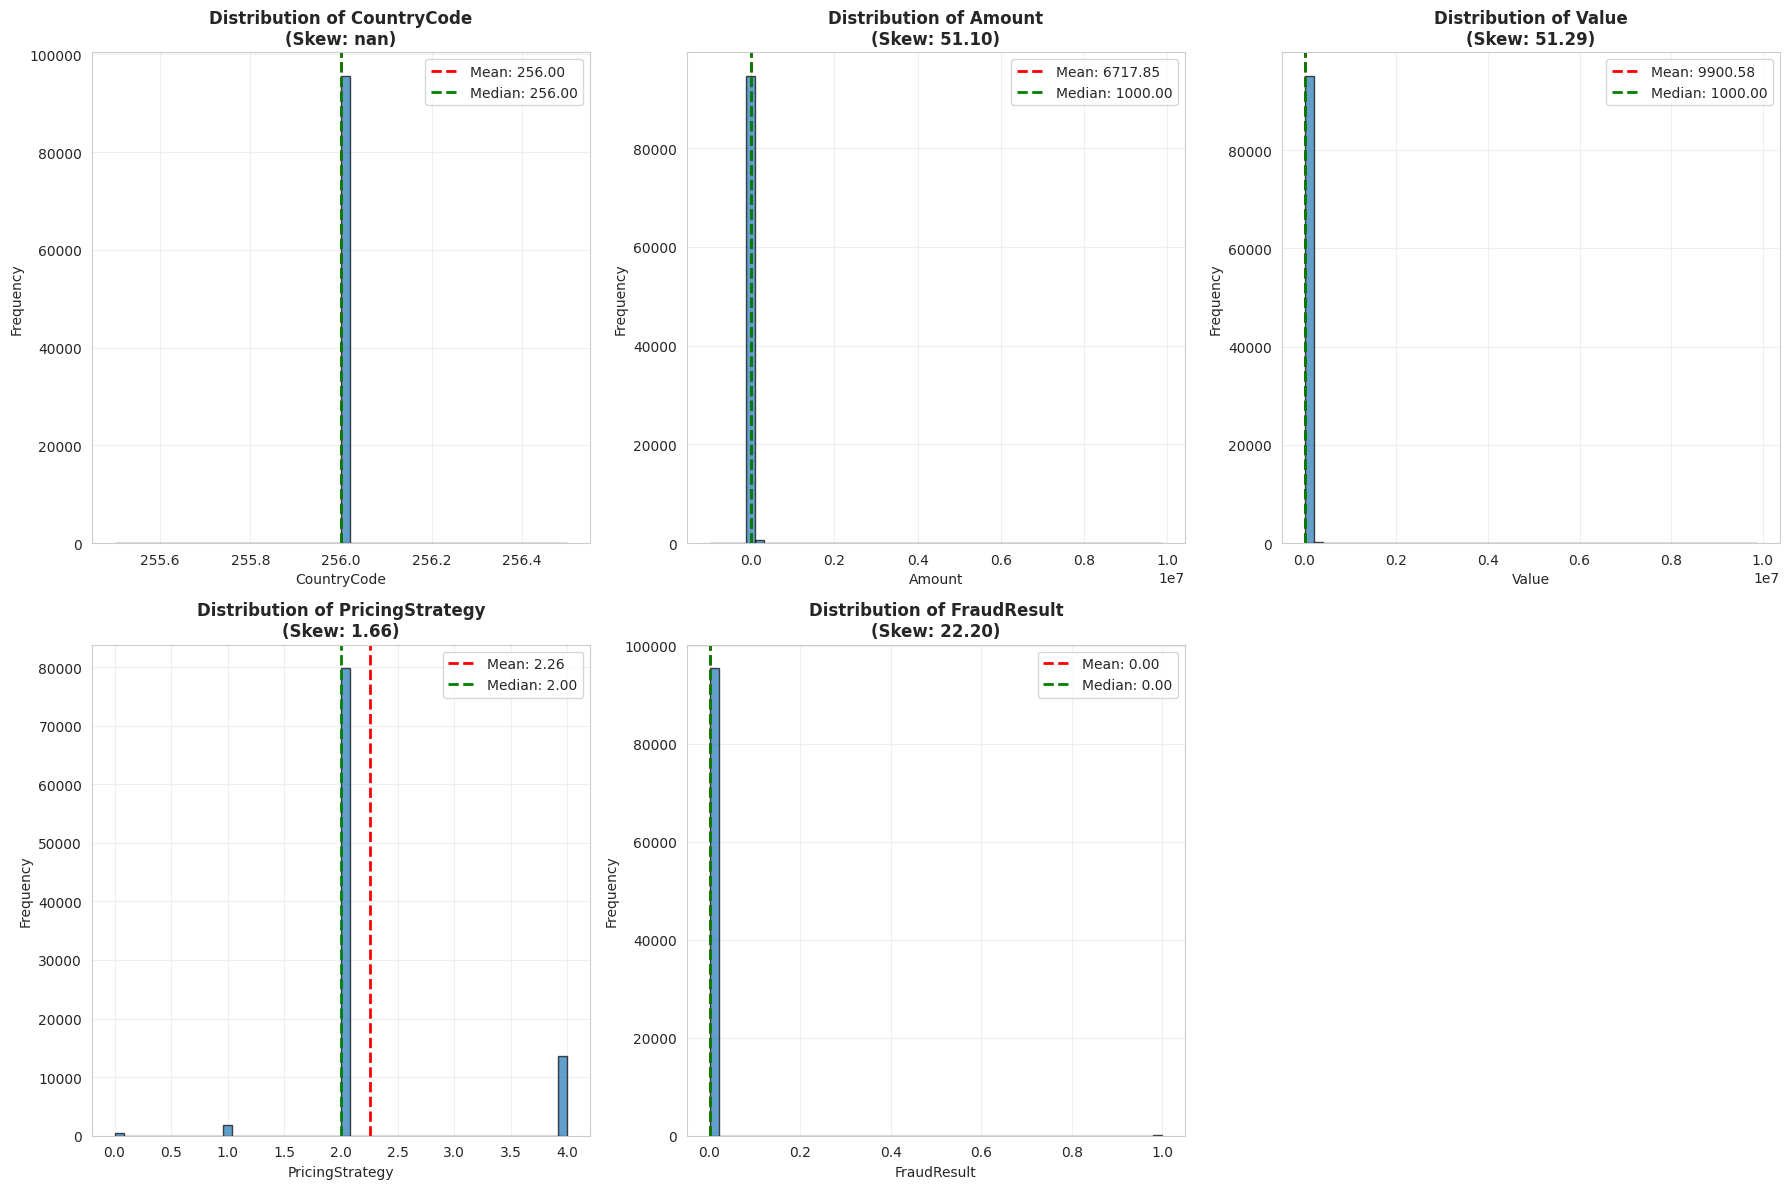

In [19]:
# Visualizations: Histograms for distribution shape
print("=" * 100)
print("DISTRIBUTION VISUALIZATIONS - HISTOGRAMS")
print("=" * 100)

n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3  # 3 columns per row

fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6 * n_rows))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(numeric_cols):
    if idx < len(axes):
        ax = axes[idx]
        df[col].hist(bins=50, ax=ax, edgecolor='black', alpha=0.7)
        ax.axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[col].mean():.2f}')
        ax.axvline(df[col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df[col].median():.2f}')
        ax.set_title(f'Distribution of {col}\n(Skew: {stats.skew(df[col].dropna()):.2f})', fontsize=12, fontweight='bold')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.legend()
        ax.grid(True, alpha=0.3)

# Hide empty subplots
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
# Outlier detection moved to Section 6: Outlier Detection


OUTLIER DETECTION (IQR Method)
       Variable  Lower Bound  Upper Bound  Outlier Count Outlier %  Min Outlier  Max Outlier
    CountryCode        256.0        256.0              0     0.00%          NaN          NaN
         Amount      -4325.0       7075.0          24441    25.55%   -1000000.0    9880000.0
          Value      -6812.5      12087.5           9021     9.43%      12300.0    9880000.0
PricingStrategy          2.0          2.0          15814    16.53%          0.0          4.0
    FraudResult          0.0          0.0            193     0.20%          1.0          1.0


In [22]:
# Summary table combining all key statistics
print("=" * 100)
print("COMPREHENSIVE STATISTICAL SUMMARY TABLE")
print("=" * 100)

comprehensive_stats = pd.DataFrame({
    'Count': df[numeric_cols].count(),
    'Mean': df[numeric_cols].mean(),
    'Median': df[numeric_cols].median(),
    'Std Dev': df[numeric_cols].std(),
    'Min': df[numeric_cols].min(),
    'Max': df[numeric_cols].max(),
    'Range': df[numeric_cols].max() - df[numeric_cols].min(),
    'IQR': df[numeric_cols].quantile(0.75) - df[numeric_cols].quantile(0.25),
    'Skewness': [stats.skew(df[col].dropna()) for col in numeric_cols],
    'Kurtosis': [stats.kurtosis(df[col].dropna()) for col in numeric_cols],
    'CV (%)': (df[numeric_cols].std() / df[numeric_cols].mean() * 100)
})

comprehensive_stats.index.name = 'Variable'
print(comprehensive_stats.round(2))


COMPREHENSIVE STATISTICAL SUMMARY TABLE
                 Count     Mean  Median    Std Dev        Min        Max  \
Variable                                                                   
CountryCode      95662   256.00   256.0       0.00      256.0      256.0   
Amount           95662  6717.85  1000.0  123306.80 -1000000.0  9880000.0   
Value            95662  9900.58  1000.0  123122.09        2.0  9880000.0   
PricingStrategy  95662     2.26     2.0       0.73        0.0        4.0   
FraudResult      95662     0.00     0.0       0.04        0.0        1.0   

                      Range     IQR  Skewness  Kurtosis   CV (%)  
Variable                                                          
CountryCode             0.0     0.0       NaN       NaN     0.00  
Amount           10880000.0  2850.0     51.10   3362.95  1835.51  
Value             9879998.0  4725.0     51.29   3377.89  1243.58  
PricingStrategy         4.0     0.0      1.66      2.09    32.49  
FraudResult             1

## Summary of Statistical Analysis

### Key Findings:

1. **Central Tendency**: 
   - Mean vs Median comparison helps identify skewness
   - Mode shows most frequent values

2. **Dispersion**:
   - Standard deviation and variance measure spread
   - IQR (Interquartile Range) is robust to outliers
   - Coefficient of Variation shows relative variability

3. **Distribution Shape**:
   - **Skewness**: 
     - |Skew| < 0.5: Approximately symmetric
     - 0.5 ≤ |Skew| < 1: Moderately skewed
     - |Skew| ≥ 1: Highly skewed
   - **Kurtosis**:
     - Kurt < -0.5: Light-tailed (platykurtic)
     - -0.5 ≤ Kurt ≤ 0.5: Normal-tailed (mesokurtic)
     - Kurt > 0.5: Heavy-tailed (leptokurtic)

4. **Outliers**: 
   - Detected using IQR method (values beyond Q1 - 1.5×IQR or Q3 + 1.5×IQR)
   - Important for understanding data quality and potential data issues


## 3. Distribution of Categorical Features

Analyzing the distribution of categorical features provides insights into the frequency and variability of categories.


In [23]:
# Get categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("=" * 100)
print("CATEGORICAL COLUMNS IDENTIFICATION")
print("=" * 100)
print(f"Categorical columns: {categorical_cols}")
print(f"Total categorical columns: {len(categorical_cols)}")

# Cardinality analysis (number of unique values)
print("\n" + "=" * 100)
print("CARDINALITY ANALYSIS (Number of Unique Values)")
print("=" * 100)
cardinality = pd.DataFrame({
    'Column': categorical_cols,
    'Unique Values': [df[col].nunique() for col in categorical_cols],
    'Total Values': [len(df[col]) for col in categorical_cols],
    'Cardinality Ratio': [df[col].nunique() / len(df[col]) for col in categorical_cols]
})
cardinality = cardinality.sort_values('Unique Values', ascending=False)
print(cardinality.to_string(index=False))


CATEGORICAL COLUMNS IDENTIFICATION
Categorical columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId']
Total categorical columns: 10

CARDINALITY ANALYSIS (Number of Unique Values)
         Column  Unique Values  Total Values  Cardinality Ratio
  TransactionId          95662         95662           1.000000
        BatchId          94809         95662           0.991083
     CustomerId           3742         95662           0.039117
      AccountId           3633         95662           0.037977
 SubscriptionId           3627         95662           0.037915
      ProductId             23         95662           0.000240
ProductCategory              9         95662           0.000094
     ProviderId              6         95662           0.000063
      ChannelId              4         95662           0.000042
   CurrencyCode              1         95662           0.000010


In [24]:
# Frequency analysis for each categorical feature
print("=" * 100)
print("FREQUENCY ANALYSIS - VALUE COUNTS AND PERCENTAGES")
print("=" * 100)

for col in categorical_cols:
    print(f"\n{'='*100}")
    print(f"Column: {col}")
    print(f"{'='*100}")
    
    value_counts = df[col].value_counts()
    value_counts_pct = df[col].value_counts(normalize=True) * 100
    
    freq_df = pd.DataFrame({
        'Count': value_counts,
        'Percentage (%)': value_counts_pct
    })
    
    print(f"\nTotal unique values: {df[col].nunique()}")
    print(f"Most frequent value: {df[col].mode()[0] if len(df[col].mode()) > 0 else 'N/A'}")
    print(f"Most frequent count: {value_counts.iloc[0] if len(value_counts) > 0 else 0}")
    print(f"Most frequent percentage: {value_counts_pct.iloc[0]:.2f}%")
    
    print(f"\nTop 10 most frequent values:")
    print(freq_df.head(10).to_string())
    
    if df[col].nunique() > 10:
        print(f"\n... and {df[col].nunique() - 10} more unique values")


FREQUENCY ANALYSIS - VALUE COUNTS AND PERCENTAGES

Column: TransactionId

Total unique values: 95662
Most frequent value: TransactionId_1
Most frequent count: 1
Most frequent percentage: 0.00%

Top 10 most frequent values:
                      Count  Percentage (%)
TransactionId                              
TransactionId_76871       1        0.001045
TransactionId_73770       1        0.001045
TransactionId_26203       1        0.001045
TransactionId_380         1        0.001045
TransactionId_28195       1        0.001045
TransactionId_23223       1        0.001045
TransactionId_118063      1        0.001045
TransactionId_100640      1        0.001045
TransactionId_51905       1        0.001045
TransactionId_130161      1        0.001045

... and 95652 more unique values

Column: BatchId

Total unique values: 94809
Most frequent value: BatchId_67019
Most frequent count: 28
Most frequent percentage: 0.03%

Top 10 most frequent values:
                Count  Percentage (%)
BatchId    

DISTRIBUTION VISUALIZATIONS - BAR CHARTS


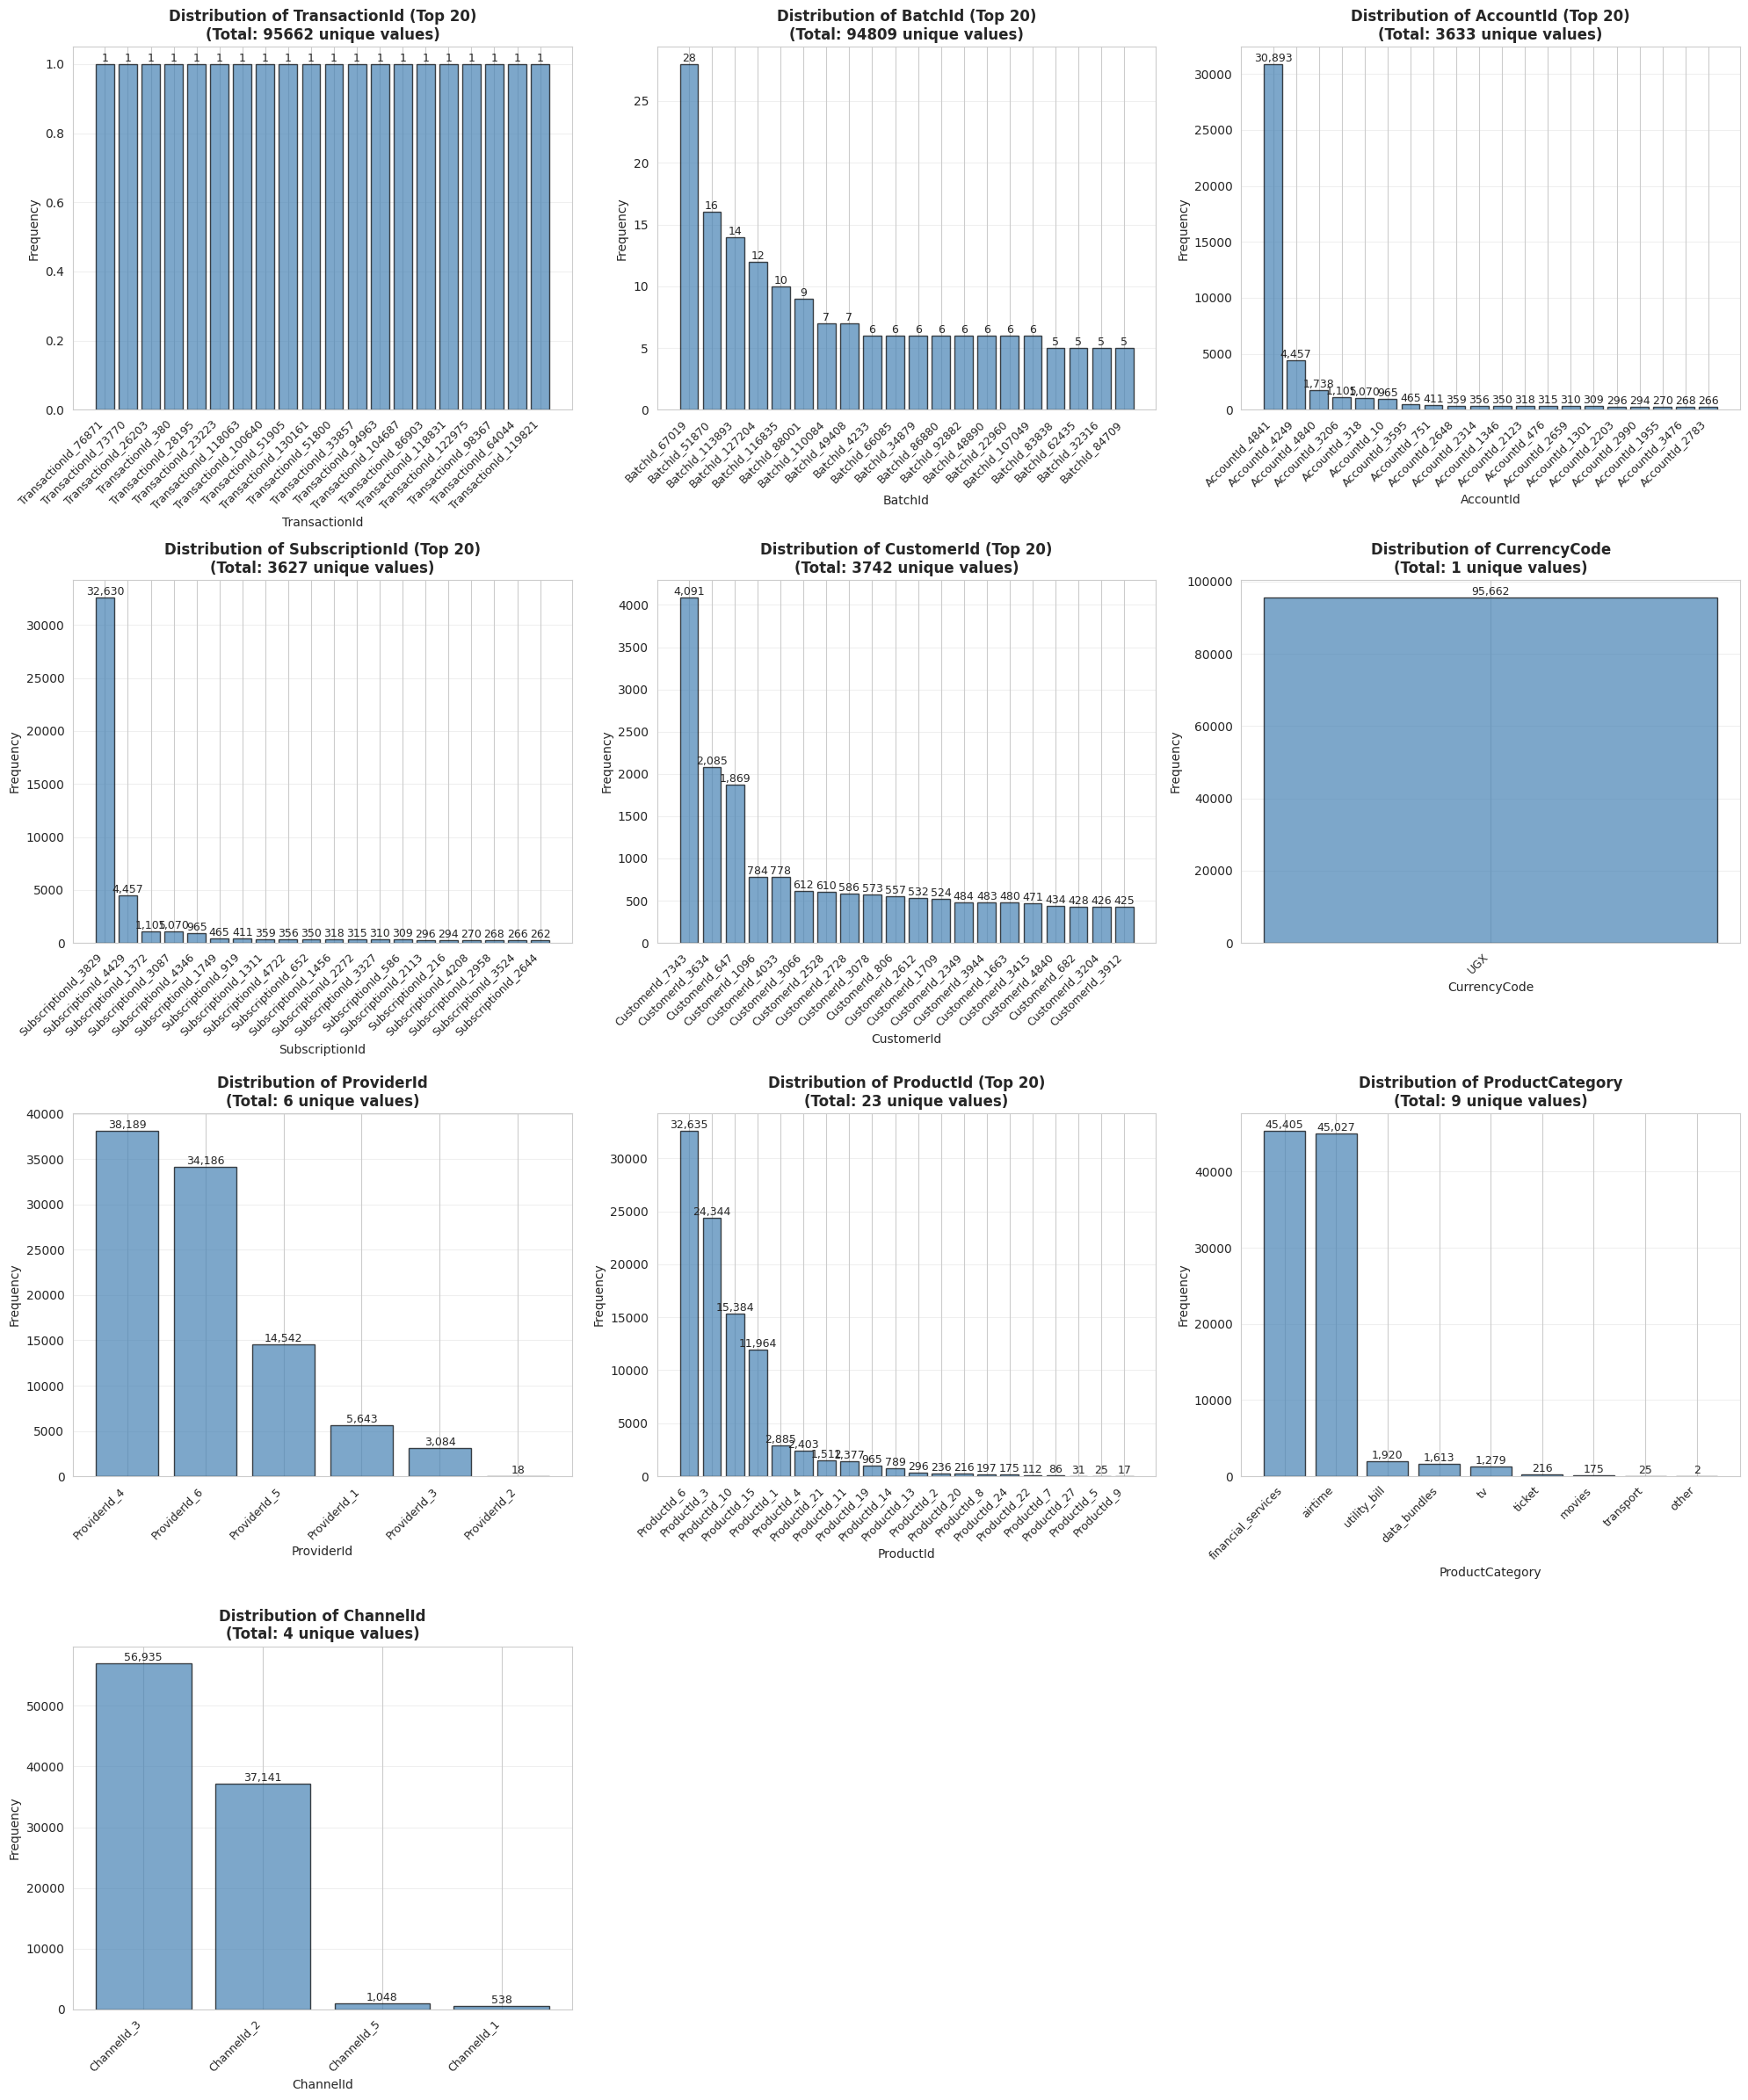

In [25]:
# Visualizations: Bar charts for categorical features
print("=" * 100)
print("DISTRIBUTION VISUALIZATIONS - BAR CHARTS")
print("=" * 100)

n_cat_cols = len(categorical_cols)
n_rows = (n_cat_cols + 2) // 3  # 3 columns per row

fig, axes = plt.subplots(n_rows, 3, figsize=(20, 6 * n_rows))
if n_cat_cols == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    if idx < len(axes):
        ax = axes[idx]
        
        # Get value counts
        value_counts = df[col].value_counts()
        
        # For high cardinality, show top N values
        if len(value_counts) > 20:
            top_n = 20
            value_counts = value_counts.head(top_n)
            title_suffix = f" (Top {top_n})"
        else:
            title_suffix = ""
        
        # Create bar chart
        bars = ax.bar(range(len(value_counts)), value_counts.values, 
                     color='steelblue', alpha=0.7, edgecolor='black')
        
        # Add value labels on bars
        for i, (bar, val) in enumerate(zip(bars, value_counts.values)):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{val:,}',
                   ha='center', va='bottom', fontsize=9)
        
        # Set labels and title
        ax.set_xticks(range(len(value_counts)))
        ax.set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=9)
        ax.set_title(f'Distribution of {col}{title_suffix}\n(Total: {df[col].nunique()} unique values)', 
                    fontsize=12, fontweight='bold')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.grid(True, alpha=0.3, axis='y')

# Hide empty subplots
for idx in range(len(categorical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


PERCENTAGE DISTRIBUTION - PIE CHARTS (Top Categories)


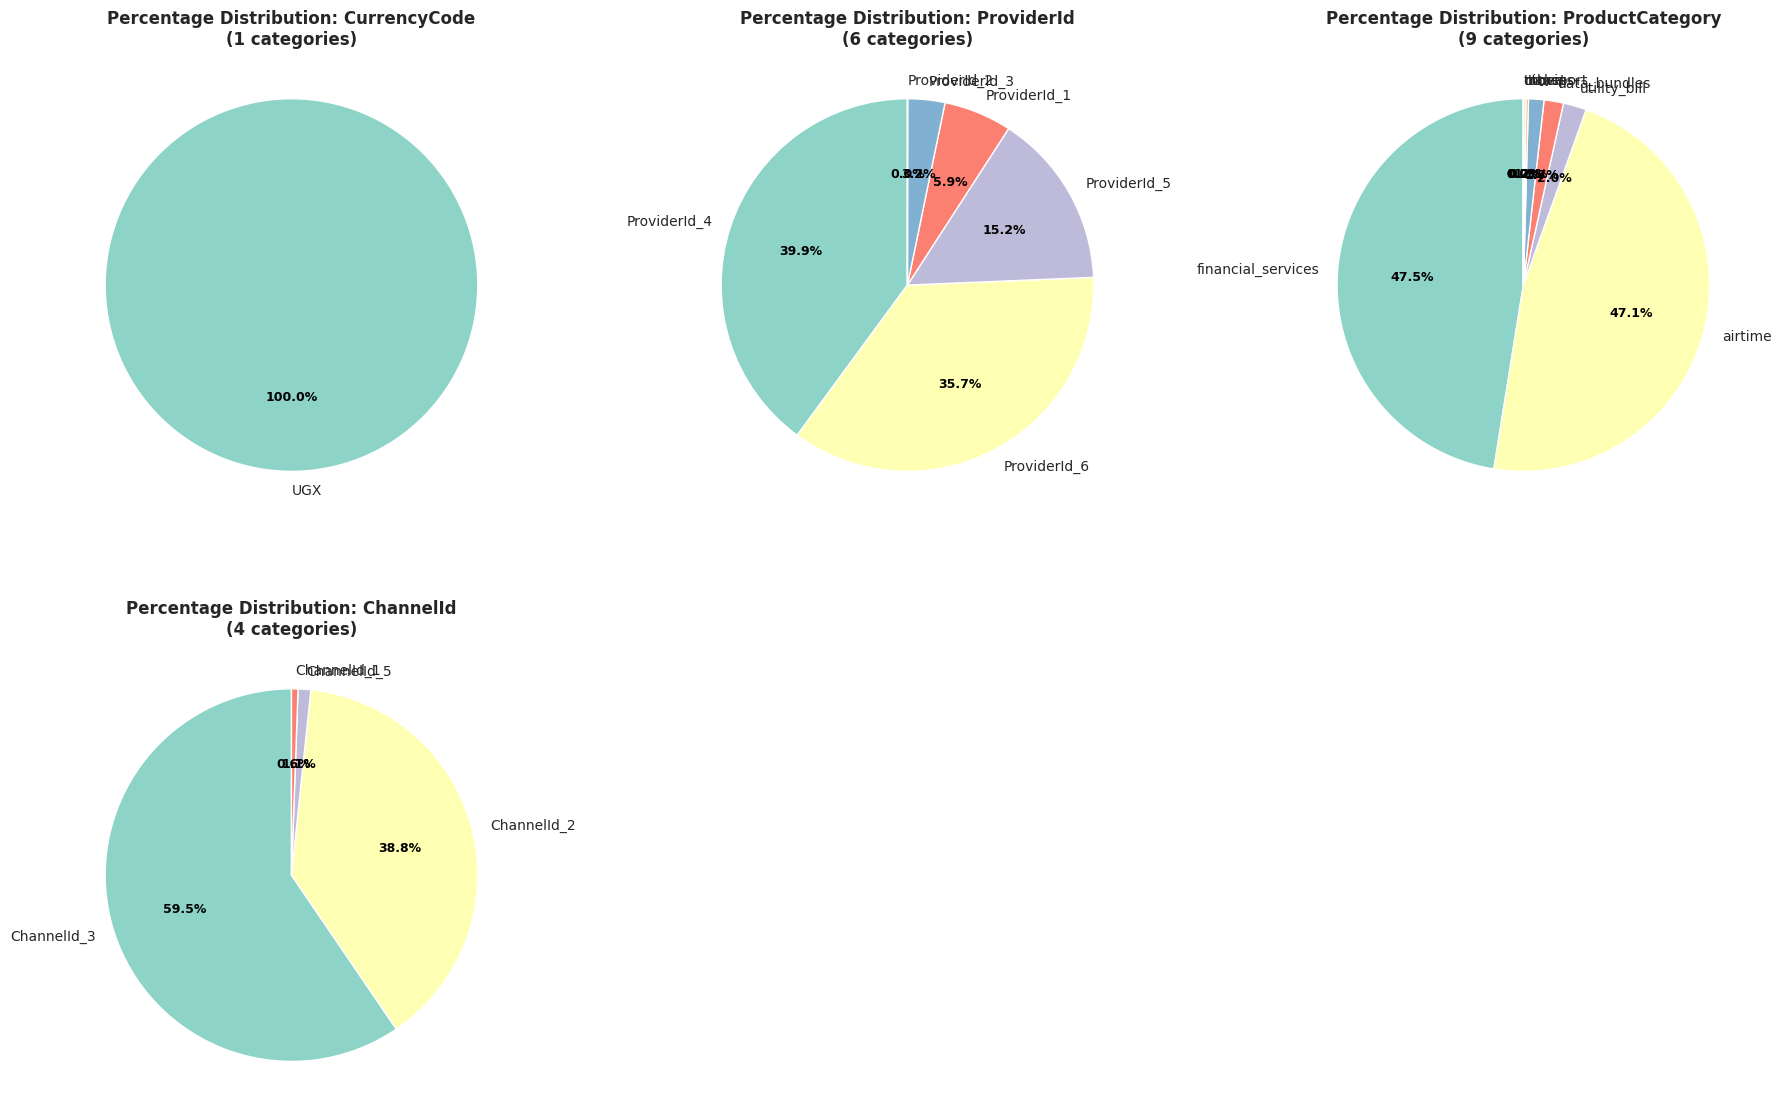

In [26]:
# Percentage distribution pie charts for categorical features (top categories)
print("=" * 100)
print("PERCENTAGE DISTRIBUTION - PIE CHARTS (Top Categories)")
print("=" * 100)

# Only show pie charts for columns with reasonable cardinality
cols_for_pie = [col for col in categorical_cols if df[col].nunique() <= 15]

if len(cols_for_pie) > 0:
    n_pie_cols = len(cols_for_pie)
    n_rows = (n_pie_cols + 2) // 3
    
    fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6 * n_rows))
    if n_pie_cols == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for idx, col in enumerate(cols_for_pie):
        if idx < len(axes):
            ax = axes[idx]
            
            value_counts = df[col].value_counts()
            value_counts_pct = (value_counts / len(df)) * 100
            
            # Create pie chart
            colors = plt.cm.Set3(range(len(value_counts)))
            wedges, texts, autotexts = ax.pie(value_counts.values, 
                                             labels=value_counts.index,
                                             autopct='%1.1f%%',
                                             startangle=90,
                                             colors=colors)
            
            # Improve text readability
            for autotext in autotexts:
                autotext.set_color('black')
                autotext.set_fontweight('bold')
                autotext.set_fontsize(9)
            
            ax.set_title(f'Percentage Distribution: {col}\n({df[col].nunique()} categories)', 
                        fontsize=12, fontweight='bold')
    
    # Hide empty subplots
    for idx in range(len(cols_for_pie), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns with suitable cardinality for pie charts (all have >15 unique values)")


In [27]:
# Summary statistics for categorical features
print("=" * 100)
print("CATEGORICAL FEATURES SUMMARY STATISTICS")
print("=" * 100)

categorical_summary = []

for col in categorical_cols:
    value_counts = df[col].value_counts()
    value_counts_pct = df[col].value_counts(normalize=True) * 100
    
    categorical_summary.append({
        'Column': col,
        'Unique Values': df[col].nunique(),
        'Mode': df[col].mode()[0] if len(df[col].mode()) > 0 else 'N/A',
        'Mode Frequency': value_counts.iloc[0] if len(value_counts) > 0 else 0,
        'Mode Percentage (%)': value_counts_pct.iloc[0] if len(value_counts_pct) > 0 else 0,
        'Missing Values': df[col].isnull().sum(),
        'Missing %': (df[col].isnull().sum() / len(df)) * 100,
        'Most Common 3': ', '.join([f"{val}({pct:.1f}%)" 
                                     for val, pct in zip(value_counts.head(3).index, 
                                                        value_counts_pct.head(3).values)])
    })

cat_summary_df = pd.DataFrame(categorical_summary)
print(cat_summary_df.to_string(index=False))


CATEGORICAL FEATURES SUMMARY STATISTICS
         Column  Unique Values                Mode  Mode Frequency  Mode Percentage (%)  Missing Values  Missing %                                                                    Most Common 3
  TransactionId          95662     TransactionId_1               1             0.001045               0        0.0  TransactionId_76871(0.0%), TransactionId_73770(0.0%), TransactionId_26203(0.0%)
        BatchId          94809       BatchId_67019              28             0.029270               0        0.0                   BatchId_67019(0.0%), BatchId_51870(0.0%), BatchId_113893(0.0%)
      AccountId           3633      AccountId_4841           30893            32.293910               0        0.0                AccountId_4841(32.3%), AccountId_4249(4.7%), AccountId_4840(1.8%)
 SubscriptionId           3627 SubscriptionId_3829           32630            34.109678               0        0.0 SubscriptionId_3829(34.1%), SubscriptionId_4429(4.7%), Subscr

In [28]:
# Entropy analysis - measures the "randomness" or diversity of categories
print("=" * 100)
print("ENTROPY ANALYSIS (Category Diversity)")
print("=" * 100)

from scipy.stats import entropy

entropy_analysis = []

for col in categorical_cols:
    value_counts = df[col].value_counts()
    probabilities = value_counts / len(df)
    
    # Calculate entropy (higher = more diverse, lower = more concentrated)
    ent = entropy(probabilities, base=2)
    
    # Maximum possible entropy (if all categories were equally likely)
    max_entropy = np.log2(len(value_counts)) if len(value_counts) > 1 else 0
    
    # Normalized entropy (0 to 1 scale)
    normalized_entropy = ent / max_entropy if max_entropy > 0 else 0
    
    entropy_analysis.append({
        'Column': col,
        'Entropy': ent,
        'Max Entropy': max_entropy,
        'Normalized Entropy': normalized_entropy,
        'Interpretation': 'High diversity' if normalized_entropy > 0.7 
                         else 'Moderate diversity' if normalized_entropy > 0.4 
                         else 'Low diversity (concentrated)'
    })

entropy_df = pd.DataFrame(entropy_analysis)
entropy_df = entropy_df.sort_values('Normalized Entropy', ascending=False)
print(entropy_df.to_string(index=False))
print("\nNote: Higher entropy indicates more uniform distribution across categories.")
print("Lower entropy indicates concentration in fewer categories.")


ENTROPY ANALYSIS (Category Diversity)
         Column   Entropy  Max Entropy  Normalized Entropy               Interpretation
  TransactionId 16.545658    16.545658            1.000000               High diversity
        BatchId 16.524154    16.532736            0.999481               High diversity
     CustomerId  9.960810    11.869594            0.839187               High diversity
     ProviderId  1.875466     2.584963            0.725529               High diversity
      AccountId  7.492299    11.826946            0.633494           Moderate diversity
 SubscriptionId  7.389087    11.824561            0.624893           Moderate diversity
      ProductId  2.556800     4.523562            0.565218           Moderate diversity
      ChannelId  1.088877     2.000000            0.544439           Moderate diversity
ProductCategory  1.357632     3.169925            0.428285           Moderate diversity
   CurrencyCode  0.000000     0.000000            0.000000 Low diversity (concentr

## Summary of Categorical Features Analysis

### Key Findings:

1. **Cardinality**: 
   - Number of unique values per categorical feature
   - High cardinality features may need special handling (e.g., grouping)

2. **Frequency Distribution**:
   - Most frequent categories and their percentages
   - Identifies dominant categories and potential class imbalance

3. **Visualizations**:
   - **Bar Charts**: Show frequency distribution of all categories
   - **Pie Charts**: Show percentage distribution (for low cardinality features)

4. **Entropy Analysis**:
   - Measures category diversity
   - High entropy = uniform distribution across categories
   - Low entropy = concentrated in few categories

5. **Missing Values**: 
   - Identifies categorical features with missing data
   - Important for data preprocessing decisions


## 4. Correlation Analysis

Understanding the relationship between numerical features.


In [43]:
# Calculate correlation matrix for numerical features
print("=" * 100)
print("CORRELATION MATRIX - NUMERICAL FEATURES")
print("=" * 100)

# Get numerical columns (exclude any ID columns that might be numeric)
numeric_cols_for_corr = [col for col in numeric_cols if 'Id' not in col or col in ['CountryCode']]

correlation_matrix = df[numeric_cols_for_corr].corr()

print(f"\nCorrelation matrix shape: {correlation_matrix.shape}")
print(f"Features analyzed: {len(numeric_cols_for_corr)}")
print("\nCorrelation Matrix:")
print(correlation_matrix.round(3))


CORRELATION MATRIX - NUMERICAL FEATURES

Correlation matrix shape: (5, 5)
Features analyzed: 5

Correlation Matrix:
                 CountryCode  Amount  Value  PricingStrategy  FraudResult
CountryCode              NaN     NaN    NaN              NaN          NaN
Amount                   NaN   1.000  0.990           -0.062        0.557
Value                    NaN   0.990  1.000           -0.017        0.567
PricingStrategy          NaN  -0.062 -0.017            1.000       -0.034
FraudResult              NaN   0.557  0.567           -0.034        1.000


CORRELATION HEATMAP


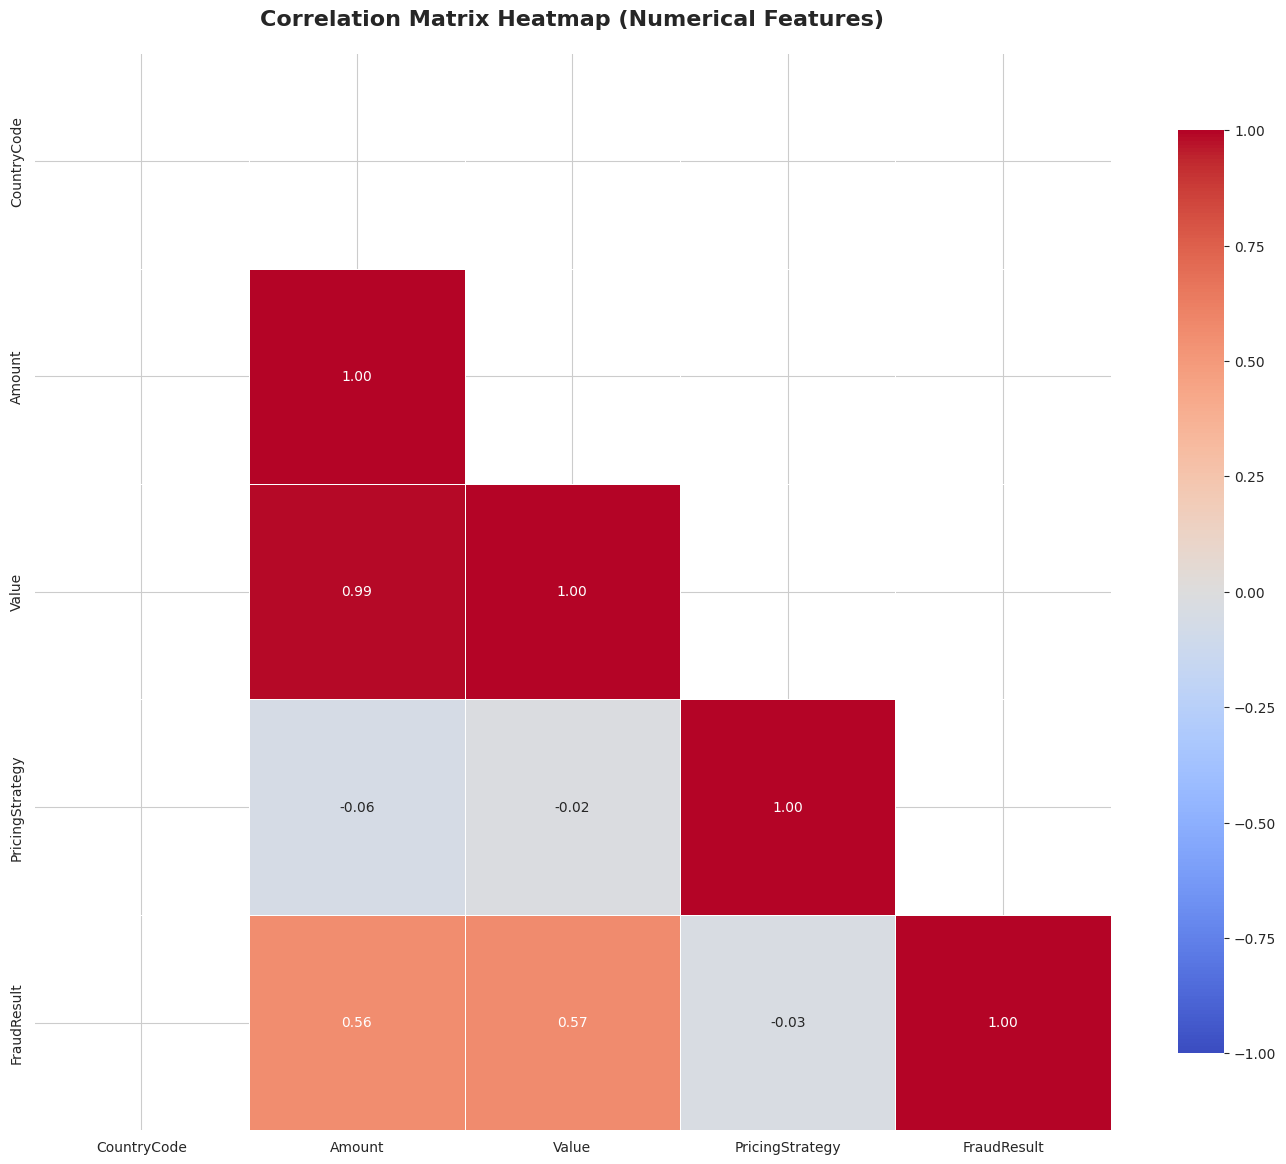

In [44]:
# Visualize correlation matrix with heatmap
print("=" * 100)
print("CORRELATION HEATMAP")
print("=" * 100)

plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)  # Mask upper triangle

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True, 
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            vmin=-1, 
            vmax=1)

plt.title('Correlation Matrix Heatmap (Numerical Features)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


In [45]:
# Identify strong correlations (above threshold)
print("=" * 100)
print("STRONG CORRELATIONS IDENTIFICATION")
print("=" * 100)

threshold = 0.7  # Correlation threshold
strong_correlations = []

# Get upper triangle of correlation matrix (excluding diagonal)
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) >= threshold:
            strong_correlations.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': corr_value,
                'Strength': 'Very Strong' if abs(corr_value) >= 0.9 
                           else 'Strong' if abs(corr_value) >= 0.8 
                           else 'Moderate-Strong',
                'Type': 'Positive' if corr_value > 0 else 'Negative'
            })

# Initialize strong_corr_df (will be empty if no strong correlations)
if strong_correlations:
    strong_corr_df = pd.DataFrame(strong_correlations)
    strong_corr_df = strong_corr_df.sort_values('Correlation', key=abs, ascending=False)
    print(f"\nFound {len(strong_correlations)} pairs with |correlation| >= {threshold}")
    print(strong_corr_df.to_string(index=False))
else:
    strong_corr_df = pd.DataFrame(columns=['Feature 1', 'Feature 2', 'Correlation', 'Strength', 'Type'])
    print(f"\nNo pairs found with |correlation| >= {threshold}")
    print("All correlations are below the threshold.")


STRONG CORRELATIONS IDENTIFICATION

Found 1 pairs with |correlation| >= 0.7
Feature 1 Feature 2  Correlation    Strength     Type
   Amount     Value     0.989692 Very Strong Positive


In [46]:
# Correlation strength analysis
print("=" * 100)
print("CORRELATION STRENGTH DISTRIBUTION")
print("=" * 100)

# Flatten correlation matrix (excluding diagonal and duplicates)
corr_values = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_values.append(abs(correlation_matrix.iloc[i, j]))

corr_series = pd.Series(corr_values)

print(f"\nTotal feature pairs analyzed: {len(corr_values)}")
print(f"\nCorrelation Statistics:")
print(f"  Mean absolute correlation: {corr_series.mean():.3f}")
print(f"  Median absolute correlation: {corr_series.median():.3f}")
print(f"  Max absolute correlation: {corr_series.max():.3f}")
print(f"  Min absolute correlation: {corr_series.min():.3f}")

print(f"\nCorrelation Strength Distribution:")
strength_ranges = {
    'Very Strong (≥0.9)': len([x for x in corr_values if x >= 0.9]),
    'Strong (0.8-0.9)': len([x for x in corr_values if 0.8 <= x < 0.9]),
    'Moderate (0.5-0.8)': len([x for x in corr_values if 0.5 <= x < 0.8]),
    'Weak (0.3-0.5)': len([x for x in corr_values if 0.3 <= x < 0.5]),
    'Very Weak (<0.3)': len([x for x in corr_values if x < 0.3])
}

for strength, count in strength_ranges.items():
    percentage = (count / len(corr_values)) * 100
    print(f"  {strength}: {count} pairs ({percentage:.1f}%)")


CORRELATION STRENGTH DISTRIBUTION

Total feature pairs analyzed: 10

Correlation Statistics:
  Mean absolute correlation: 0.371
  Median absolute correlation: 0.310
  Max absolute correlation: 0.990
  Min absolute correlation: 0.017

Correlation Strength Distribution:
  Very Strong (≥0.9): 1 pairs (10.0%)
  Strong (0.8-0.9): 0 pairs (0.0%)
  Moderate (0.5-0.8): 2 pairs (20.0%)
  Weak (0.3-0.5): 0 pairs (0.0%)
  Very Weak (<0.3): 3 pairs (30.0%)


In [47]:
# Top correlations (both positive and negative)
print("=" * 100)
print("TOP CORRELATIONS (Positive and Negative)")
print("=" * 100)

# Get all correlations (excluding diagonal)
all_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        all_correlations.append({
            'Feature 1': correlation_matrix.columns[i],
            'Feature 2': correlation_matrix.columns[j],
            'Correlation': correlation_matrix.iloc[i, j]
        })

corr_df = pd.DataFrame(all_correlations)

print("\nTop 10 Strongest Positive Correlations:")
top_positive = corr_df.nlargest(10, 'Correlation')
print(top_positive.to_string(index=False))

print("\n\nTop 10 Strongest Negative Correlations:")
top_negative = corr_df.nsmallest(10, 'Correlation')
print(top_negative.to_string(index=False))


TOP CORRELATIONS (Positive and Negative)

Top 10 Strongest Positive Correlations:
      Feature 1       Feature 2  Correlation
         Amount           Value     0.989692
          Value     FraudResult     0.566739
         Amount     FraudResult     0.557370
          Value PricingStrategy    -0.017020
PricingStrategy     FraudResult    -0.033821
         Amount PricingStrategy    -0.061931
    CountryCode          Amount          NaN
    CountryCode           Value          NaN
    CountryCode PricingStrategy          NaN
    CountryCode     FraudResult          NaN


Top 10 Strongest Negative Correlations:
      Feature 1       Feature 2  Correlation
         Amount PricingStrategy    -0.061931
PricingStrategy     FraudResult    -0.033821
          Value PricingStrategy    -0.017020
         Amount     FraudResult     0.557370
          Value     FraudResult     0.566739
         Amount           Value     0.989692
    CountryCode          Amount          NaN
    CountryCode      

CORRELATION WITH TARGET VARIABLE

Target variable found: FraudResult

Correlation with target variable:
        Feature  Correlation  Abs Correlation
          Value     0.566739         0.566739
         Amount     0.557370         0.557370
PricingStrategy    -0.033821         0.033821
    CountryCode          NaN              NaN


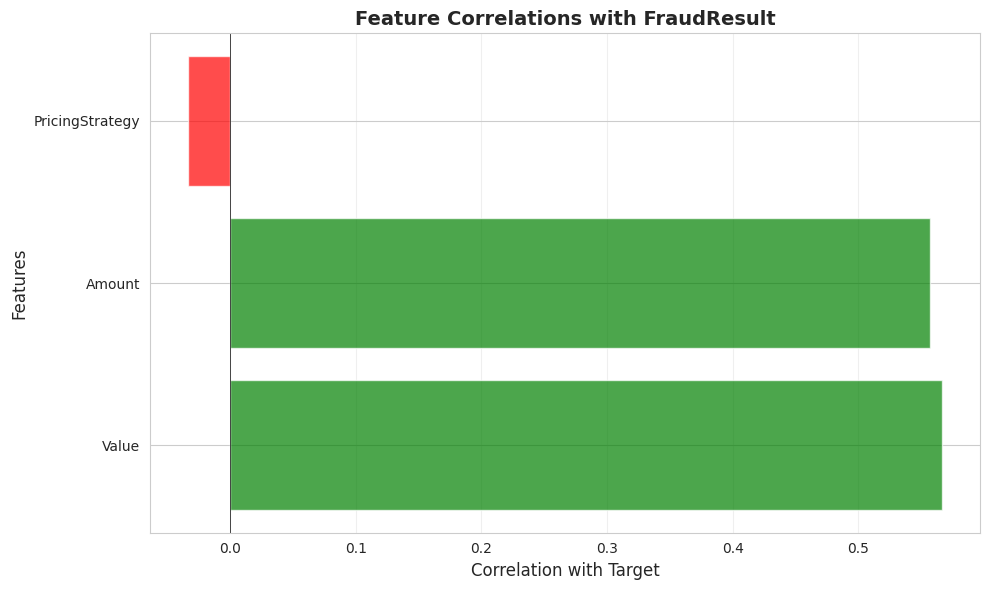

In [48]:
# Correlation with target variable (if exists)
print("=" * 100)
print("CORRELATION WITH TARGET VARIABLE")
print("=" * 100)

# Check if there's a target variable (common names)
target_candidates = ['target', 'Target', 'TARGET', 'label', 'Label', 'LABEL', 
                    'FraudResult', 'fraud_result', 'default', 'Default', 'DEFAULT']

target_col = None
for candidate in target_candidates:
    if candidate in df.columns and candidate in numeric_cols_for_corr:
        target_col = candidate
        break

if target_col:
    print(f"\nTarget variable found: {target_col}")
    print("\nCorrelation with target variable:")
    
    target_correlations = correlation_matrix[target_col].drop(target_col).sort_values(key=abs, ascending=False)
    
    target_corr_df = pd.DataFrame({
        'Feature': target_correlations.index,
        'Correlation': target_correlations.values,
        'Abs Correlation': target_correlations.abs().values
    }).sort_values('Abs Correlation', ascending=False)
    
    print(target_corr_df.to_string(index=False))
    
    # Visualize correlations with target
    plt.figure(figsize=(10, 6))
    colors = ['red' if x < 0 else 'green' for x in target_correlations.values]
    bars = plt.barh(target_corr_df['Feature'], target_corr_df['Correlation'], color=colors, alpha=0.7)
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.xlabel('Correlation with Target', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title(f'Feature Correlations with {target_col}', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo target variable found in the dataset.")
    print("Note: If you have a target variable, ensure it's included in the numerical columns.")


PAIRWISE SCATTER PLOTS FOR STRONG CORRELATIONS


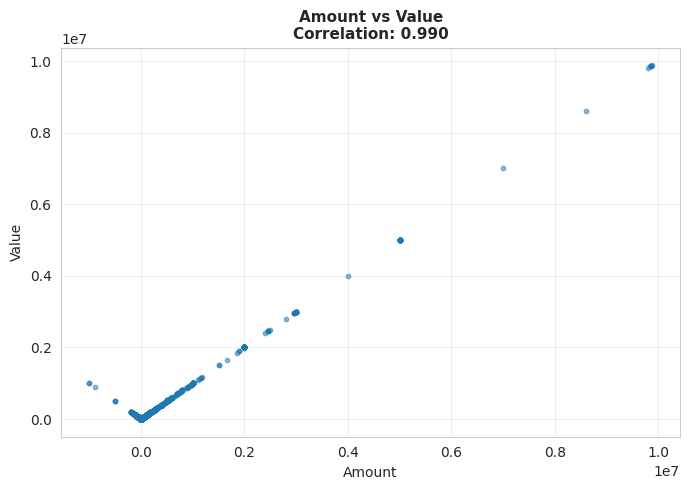

In [50]:
# Pairwise scatter plots for highly correlated features
print("=" * 100)
print("PAIRWISE SCATTER PLOTS FOR STRONG CORRELATIONS")
print("=" * 100)

if strong_correlations and len(strong_correlations) > 0:
    # Get top 6 strongest correlations for visualization
    top_pairs = strong_corr_df.head(6) if len(strong_correlations) >= 6 else strong_corr_df
    
    n_pairs = len(top_pairs)
    n_rows = (n_pairs + 1) // 2
    n_cols = 2
    
    # Handle single plot case
    if n_pairs == 1:
        fig, ax = plt.subplots(1, 1, figsize=(7, 5))
        axes = [ax]
    else:
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
        # Flatten axes to always be a 1D array
        axes = axes.flatten() if hasattr(axes, 'flatten') else np.array(axes).flatten()
    
    # Use enumerate to get sequential index
    for plot_idx, (_, row) in enumerate(top_pairs.iterrows()):
        if plot_idx < len(axes):
            ax = axes[plot_idx]
            feat1 = row['Feature 1']
            feat2 = row['Feature 2']
            corr_val = row['Correlation']
            
            ax.scatter(df[feat1], df[feat2], alpha=0.5, s=10)
            ax.set_xlabel(feat1, fontsize=10)
            ax.set_ylabel(feat2, fontsize=10)
            ax.set_title(f'{feat1} vs {feat2}\nCorrelation: {corr_val:.3f}', 
                        fontsize=11, fontweight='bold')
            ax.grid(True, alpha=0.3)
    
    # Hide empty subplots
    for plot_idx in range(n_pairs, len(axes)):
        axes[plot_idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No strong correlations found to visualize.")


## Summary of Correlation Analysis

### Key Findings:

1. **Correlation Matrix**: 
   - Shows pairwise correlations between all numerical features
   - Values range from -1 (perfect negative) to +1 (perfect positive)

2. **Strong Correlations**:
   - Features with |correlation| ≥ 0.7 may indicate multicollinearity
   - High correlation suggests features may provide redundant information
   - Consider feature selection or dimensionality reduction

3. **Correlation Strength Guidelines**:
   - **Very Strong (≥0.9)**: Features are almost perfectly related
   - **Strong (0.8-0.9)**: Features are highly related
   - **Moderate (0.5-0.8)**: Features show meaningful relationship
   - **Weak (0.3-0.5)**: Features show slight relationship
   - **Very Weak (<0.3)**: Features are largely independent

4. **Target Variable Correlation**:
   - Features with high correlation to target are likely important predictors
   - Both positive and negative correlations can be informative

5. **Multicollinearity Considerations**:
   - Highly correlated features can cause issues in linear models
   - May need to remove or combine correlated features
   - Tree-based models are less sensitive to multicollinearity


## 5. Identifying Missing Values

Identify missing values to determine missing data patterns and decide on appropriate imputation strategies.


In [51]:
# Comprehensive missing values analysis
print("=" * 100)
print("COMPREHENSIVE MISSING VALUES ANALYSIS")
print("=" * 80)

# Calculate missing values for all columns
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

# Create summary dataframe
missing_summary = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing Percentage': missing_percent.values,
    'Data Type': df.dtypes.values
})

# Filter to only columns with missing values
missing_summary = missing_summary[missing_summary['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_summary) > 0:
    print(f"\nFound {len(missing_summary)} columns with missing values:")
    print(missing_summary.to_string(index=False))
    
    print(f"\nTotal missing values across all columns: {df.isnull().sum().sum():,}")
    print(f"Total percentage of missing data: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")
else:
    print("\n✓ No missing values found in any column!")
    print("All columns are complete.")


COMPREHENSIVE MISSING VALUES ANALYSIS

✓ No missing values found in any column!
All columns are complete.


In [52]:
# Visualize missing values pattern
print("=" * 100)
print("MISSING VALUES VISUALIZATION")
print("=" * 100)

if df.isnull().sum().sum() > 0:
    # Bar chart of missing values by column
    missing_by_col = df.isnull().sum()
    missing_by_col = missing_by_col[missing_by_col > 0].sort_values(ascending=False)
    
    if len(missing_by_col) > 0:
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Bar chart
        ax1 = axes[0]
        bars = ax1.bar(range(len(missing_by_col)), missing_by_col.values, color='coral', alpha=0.7, edgecolor='black')
        ax1.set_xticks(range(len(missing_by_col)))
        ax1.set_xticklabels(missing_by_col.index, rotation=45, ha='right')
        ax1.set_xlabel('Columns', fontsize=12)
        ax1.set_ylabel('Missing Count', fontsize=12)
        ax1.set_title('Missing Values by Column', fontsize=14, fontweight='bold')
        ax1.grid(True, alpha=0.3, axis='y')
        
        # Add value labels on bars
        for i, (bar, val) in enumerate(zip(bars, missing_by_col.values)):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{val:,}',
                    ha='center', va='bottom', fontsize=9)
        
        # Percentage bar chart
        ax2 = axes[1]
        missing_pct = (missing_by_col / len(df)) * 100
        bars2 = ax2.bar(range(len(missing_pct)), missing_pct.values, color='steelblue', alpha=0.7, edgecolor='black')
        ax2.set_xticks(range(len(missing_pct)))
        ax2.set_xticklabels(missing_pct.index, rotation=45, ha='right')
        ax2.set_xlabel('Columns', fontsize=12)
        ax2.set_ylabel('Missing Percentage (%)', fontsize=12)
        ax2.set_title('Missing Values Percentage by Column', fontsize=14, fontweight='bold')
        ax2.grid(True, alpha=0.3, axis='y')
        
        # Add percentage labels on bars
        for i, (bar, val) in enumerate(zip(bars2, missing_pct.values)):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                    f'{val:.1f}%',
                    ha='center', va='bottom', fontsize=9)
        
        plt.tight_layout()
        plt.show()
else:
    print("No missing values to visualize.")


MISSING VALUES VISUALIZATION
No missing values to visualize.


In [53]:
# Missing data pattern analysis - rows with missing values
print("=" * 100)
print("MISSING DATA PATTERN ANALYSIS")
print("=" * 100)

if df.isnull().sum().sum() > 0:
    # Count missing values per row
    df['missing_count'] = df.isnull().sum(axis=1)
    rows_with_missing = df[df['missing_count'] > 0]
    
    print(f"\nRows with missing values: {len(rows_with_missing):,}")
    print(f"Percentage of rows with missing values: {(len(rows_with_missing) / len(df)) * 100:.2f}%")
    
    # Distribution of missing values per row
    missing_per_row = df['missing_count'].value_counts().sort_index()
    print(f"\nDistribution of missing values per row:")
    print(missing_per_row.head(10))
    
    # Visualize missing data pattern matrix (for smaller datasets or sample)
    if len(df) <= 10000:
        # Create missing data matrix visualization
        plt.figure(figsize=(14, 8))
        
        # Sample if too large
        sample_size = min(1000, len(df))
        df_sample = df.sample(n=sample_size, random_state=42) if len(df) > sample_size else df
        
        # Create binary matrix (1 = missing, 0 = present)
        missing_matrix = df_sample.isnull().astype(int)
        
        plt.imshow(missing_matrix.T, aspect='auto', cmap='RdYlGn_r', interpolation='nearest')
        plt.colorbar(label='Missing (1) / Present (0)')
        plt.xlabel('Row Index', fontsize=12)
        plt.ylabel('Column Index', fontsize=12)
        plt.title(f'Missing Data Pattern Matrix (Sample of {sample_size} rows)', fontsize=14, fontweight='bold')
        plt.yticks(range(len(df.columns)), df.columns, fontsize=8)
        plt.tight_layout()
        plt.show()
    else:
        print(f"\nDataset too large ({len(df):,} rows) for pattern matrix visualization.")
        print("Consider analyzing a sample or specific columns.")
    
    # Drop the temporary column
    df = df.drop(columns=['missing_count'])
else:
    print("No missing values to analyze patterns.")


MISSING DATA PATTERN ANALYSIS
No missing values to analyze patterns.


In [54]:
# Missing values by data type
print("=" * 100)
print("MISSING VALUES BY DATA TYPE")
print("=" * 100)

if df.isnull().sum().sum() > 0:
    missing_by_type = {}
    for dtype in df.dtypes.unique():
        cols_of_type = df.select_dtypes(include=[dtype]).columns
        missing_count = df[cols_of_type].isnull().sum().sum()
        missing_pct = (missing_count / (len(df) * len(cols_of_type))) * 100 if len(cols_of_type) > 0 else 0
        missing_by_type[str(dtype)] = {
            'Columns': len(cols_of_type),
            'Missing Count': missing_count,
            'Missing Percentage': missing_pct
        }
    
    missing_type_df = pd.DataFrame(missing_by_type).T
    missing_type_df = missing_type_df.sort_values('Missing Count', ascending=False)
    print(missing_type_df.to_string())
else:
    print("No missing values to analyze by data type.")


MISSING VALUES BY DATA TYPE
No missing values to analyze by data type.


In [55]:
# Imputation strategy recommendations
print("=" * 100)
print("IMPUTATION STRATEGY RECOMMENDATIONS")
print("=" * 100)

if df.isnull().sum().sum() > 0:
    print("\nRecommended imputation strategies by column:\n")
    
    recommendations = []
    
    for col in df.columns:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            missing_pct = (missing_count / len(df)) * 100
            dtype = df[col].dtype
            
            # Determine strategy based on missing percentage and data type
            if missing_pct > 50:
                strategy = "Consider removing column or investigate data collection issue"
            elif missing_pct > 20:
                if dtype in ['int64', 'float64']:
                    strategy = "Median imputation (robust to outliers) or advanced methods (KNN, MICE)"
                else:
                    strategy = "Mode imputation or create 'Missing' category"
            elif missing_pct > 5:
                if dtype in ['int64', 'float64']:
                    strategy = "Mean/Median imputation or forward/backward fill for time series"
                else:
                    strategy = "Mode imputation or forward/backward fill"
            else:
                if dtype in ['int64', 'float64']:
                    strategy = "Mean/Median imputation (simple and effective)"
                else:
                    strategy = "Mode imputation (simple and effective)"
            
            recommendations.append({
                'Column': col,
                'Missing %': f"{missing_pct:.2f}%",
                'Data Type': str(dtype),
                'Recommended Strategy': strategy
            })
    
    rec_df = pd.DataFrame(recommendations)
    print(rec_df.to_string(index=False))
    
    print("\n\nGeneral Imputation Guidelines:")
    print("=" * 100)
    print("""
1. **Low Missing (<5%)**: 
   - Numerical: Mean/Median imputation
   - Categorical: Mode imputation
   
2. **Moderate Missing (5-20%)**:
   - Numerical: Median (robust) or advanced methods (KNN, MICE)
   - Categorical: Mode or create 'Missing' category
   - Consider investigating why data is missing
   
3. **High Missing (20-50%)**:
   - Use advanced imputation methods (KNN, MICE, model-based)
   - Consider creating indicator variables for missingness
   - Investigate missing data mechanism (MCAR, MAR, MNAR)
   
4. **Very High Missing (>50%)**:
   - Consider removing the column
   - Or use as-is with missing indicator
   - Investigate data collection process
   
5. **Time Series Data**:
   - Forward fill or backward fill
   - Interpolation methods
   
6. **Categorical with High Cardinality**:
   - Create 'Missing' or 'Unknown' category
   - Avoid mode imputation if mode is rare
    """)
else:
    print("\n✓ No missing values found!")
    print("No imputation strategies needed.")


IMPUTATION STRATEGY RECOMMENDATIONS

✓ No missing values found!
No imputation strategies needed.


## Summary of Missing Values Analysis

### Key Findings:

1. **Missing Data Identification**: 
   - Count and percentage of missing values per column
   - Total missing data across the dataset

2. **Missing Data Patterns**:
   - Rows with missing values
   - Distribution of missingness across rows
   - Pattern matrix visualization (for smaller datasets)

3. **Missing Data by Type**:
   - Missing values grouped by data type (numerical vs categorical)
   - Helps identify systematic issues

4. **Imputation Strategy Recommendations**:
   - Strategy recommendations based on:
     - Missing percentage (low, moderate, high, very high)
     - Data type (numerical vs categorical)
     - Data characteristics (time series, high cardinality, etc.)

5. **Missing Data Mechanisms** (to consider):
   - **MCAR (Missing Completely At Random)**: Missingness is independent of observed and unobserved data
   - **MAR (Missing At Random)**: Missingness depends on observed data
   - **MNAR (Missing Not At Random)**: Missingness depends on unobserved data

### Next Steps:
- Implement recommended imputation strategies in data preprocessing
- Create missing indicator variables if needed
- Validate imputation quality


## 6. Outlier Detection

Use box plots to identify outliers and analyze their impact on the dataset.


BOX PLOTS FOR OUTLIER DETECTION


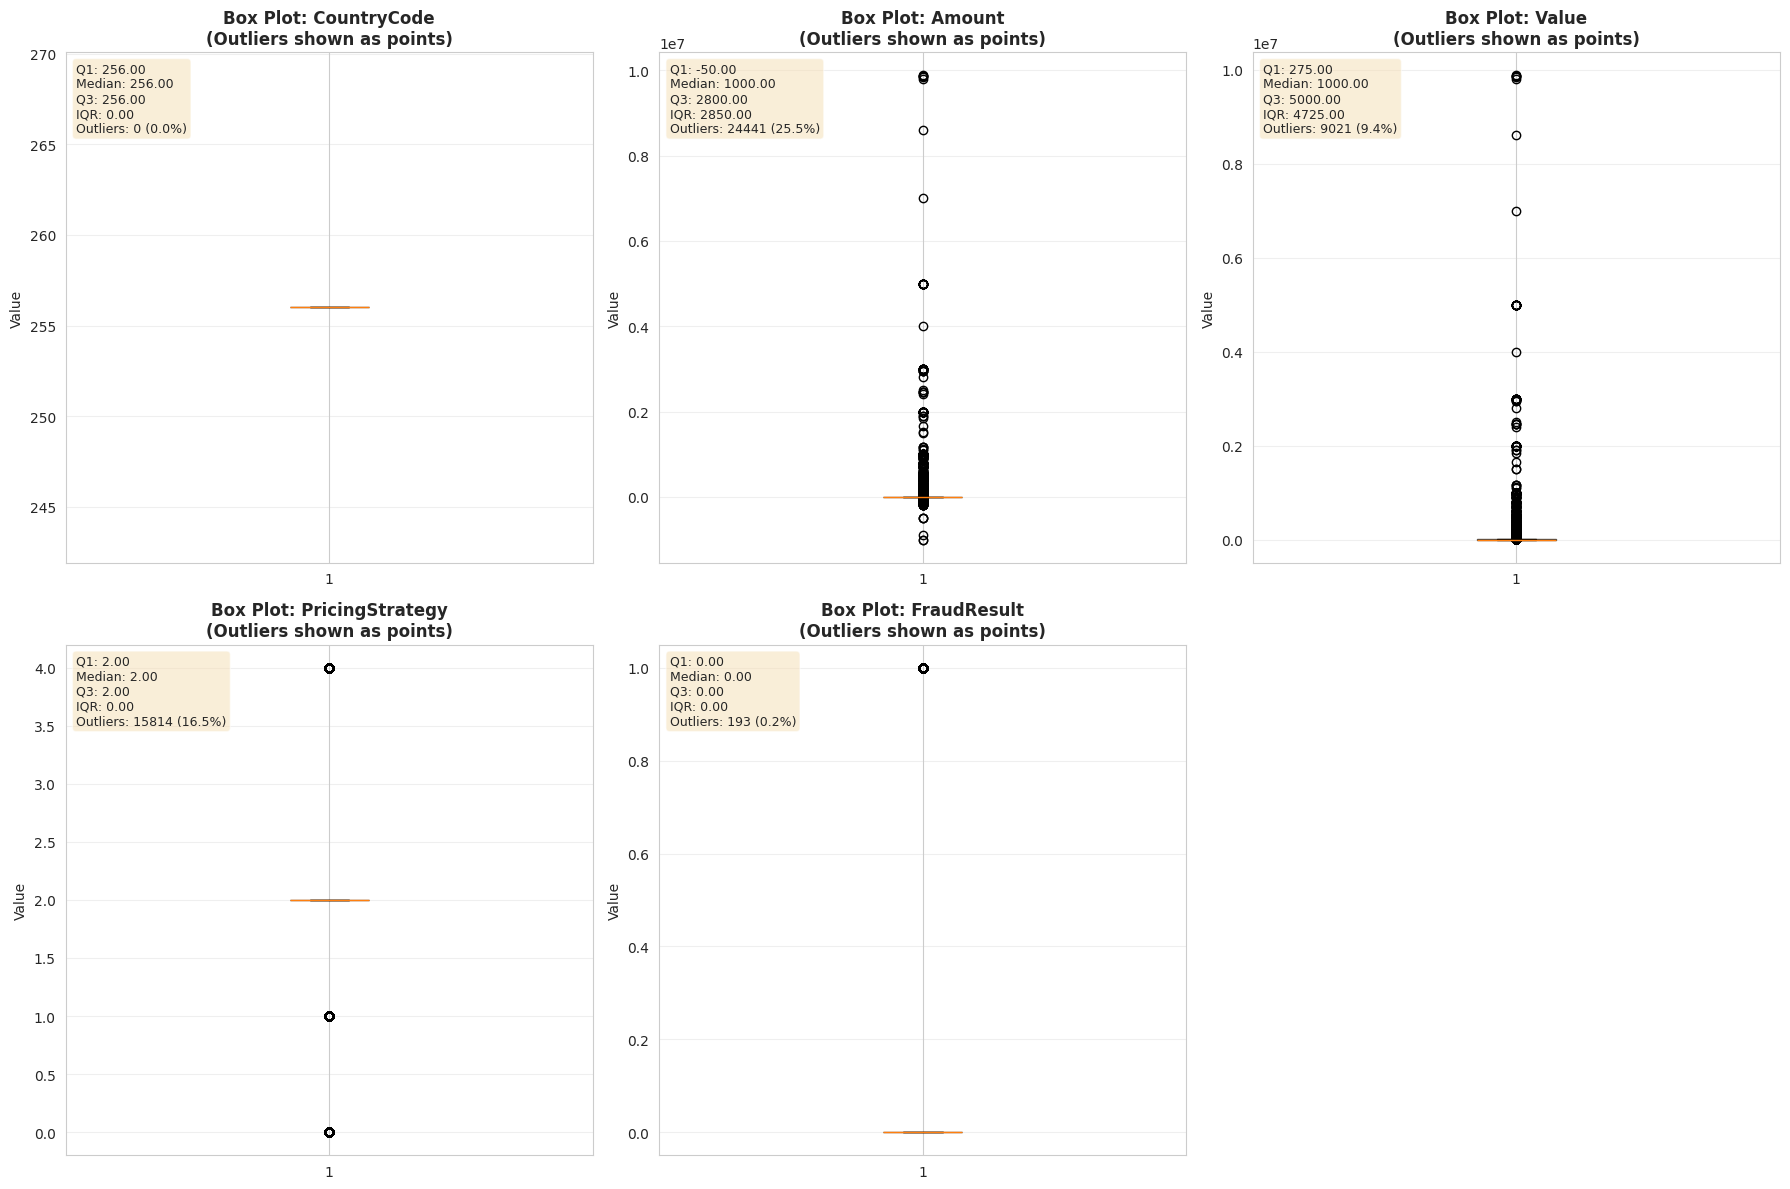

In [56]:
# Box plots for outlier detection
print("=" * 100)
print("BOX PLOTS FOR OUTLIER DETECTION")
print("=" * 100)

n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3  # 3 columns per row

fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6 * n_rows))
if n_cols == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    if idx < len(axes):
        ax = axes[idx]
        box_data = df[col].dropna()
        
        # Create box plot
        bp = ax.boxplot(box_data, vert=True, patch_artist=True, showfliers=True)
        bp['boxes'][0].set_facecolor('lightblue')
        bp['boxes'][0].set_alpha(0.7)
        
        # Add statistics text
        q1 = box_data.quantile(0.25)
        median = box_data.median()
        q3 = box_data.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Count outliers
        outliers = box_data[(box_data < lower_bound) | (box_data > upper_bound)]
        outlier_count = len(outliers)
        outlier_pct = (outlier_count / len(box_data)) * 100
        
        stats_text = f'Q1: {q1:.2f}\nMedian: {median:.2f}\nQ3: {q3:.2f}\nIQR: {iqr:.2f}\nOutliers: {outlier_count} ({outlier_pct:.1f}%)'
        ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                fontsize=9)
        
        ax.set_title(f'Box Plot: {col}\n(Outliers shown as points)', fontsize=12, fontweight='bold')
        ax.set_ylabel('Value')
        ax.grid(True, alpha=0.3, axis='y')

# Hide empty subplots
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


In [57]:
# Comprehensive outlier detection using IQR method
print("=" * 100)
print("OUTLIER DETECTION - IQR METHOD")
print("=" * 100)

outlier_summary = []

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    # Calculate outlier statistics
    outlier_summary.append({
        'Variable': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': outlier_count,
        'Outlier %': f"{outlier_percentage:.2f}%",
        'Min Outlier': outliers.min() if outlier_count > 0 else np.nan,
        'Max Outlier': outliers.max() if outlier_count > 0 else np.nan,
        'Mean (outliers)': outliers.mean() if outlier_count > 0 else np.nan
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))


OUTLIER DETECTION - IQR METHOD
       Variable    Q1     Q3    IQR  Lower Bound  Upper Bound  Outlier Count Outlier %  Min Outlier  Max Outlier  Mean (outliers)
    CountryCode 256.0  256.0    0.0        256.0        256.0              0     0.00%          NaN          NaN              NaN
         Amount -50.0 2800.0 2850.0      -4325.0       7075.0          24441    25.55%   -1000000.0    9880000.0     23299.552576
          Value 275.0 5000.0 4725.0      -6812.5      12087.5           9021     9.43%      12300.0    9880000.0     80983.192440
PricingStrategy   2.0    2.0    0.0          2.0          2.0          15814    16.53%          0.0          4.0         3.548438
    FraudResult   0.0    0.0    0.0          0.0          0.0            193     0.20%          1.0          1.0         1.000000


In [58]:
# Z-score method for outlier detection (alternative method)
print("=" * 100)
print("OUTLIER DETECTION - Z-SCORE METHOD")
print("=" * 100)

from scipy import stats

zscore_outlier_summary = []
z_threshold = 3  # Standard threshold: values beyond 3 standard deviations

for col in numeric_cols:
    z_scores = np.abs(stats.zscore(df[col].dropna()))
    outliers_zscore = df[col].dropna()[z_scores > z_threshold]
    outlier_count_z = len(outliers_zscore)
    outlier_pct_z = (outlier_count_z / len(df[col].dropna())) * 100
    
    zscore_outlier_summary.append({
        'Variable': col,
        'Z-Score Threshold': z_threshold,
        'Outlier Count': outlier_count_z,
        'Outlier %': f"{outlier_pct_z:.2f}%",
        'Min Outlier': outliers_zscore.min() if outlier_count_z > 0 else np.nan,
        'Max Outlier': outliers_zscore.max() if outlier_count_z > 0 else np.nan
    })

zscore_df = pd.DataFrame(zscore_outlier_summary)
print(zscore_df.to_string(index=False))
print(f"\nNote: Z-score method identifies values beyond {z_threshold} standard deviations from the mean.")


OUTLIER DETECTION - Z-SCORE METHOD
       Variable  Z-Score Threshold  Outlier Count Outlier %  Min Outlier  Max Outlier
    CountryCode                  3              0     0.00%          NaN          NaN
         Amount                  3            269     0.28%   -1000000.0    9880000.0
          Value                  3            269     0.28%     380000.0    9880000.0
PricingStrategy                  3            385     0.40%          0.0          0.0
    FraudResult                  3            193     0.20%          1.0          1.0

Note: Z-score method identifies values beyond 3 standard deviations from the mean.


In [59]:
# Compare IQR vs Z-score methods
print("=" * 100)
print("COMPARISON: IQR vs Z-SCORE METHODS")
print("=" * 100)

comparison = pd.DataFrame({
    'Variable': outlier_df['Variable'],
    'IQR Outlier Count': outlier_df['Outlier Count'],
    'IQR Outlier %': outlier_df['Outlier %'],
    'Z-Score Outlier Count': zscore_df['Outlier Count'],
    'Z-Score Outlier %': zscore_df['Outlier %']
})

comparison['Difference'] = comparison['IQR Outlier Count'] - comparison['Z-Score Outlier Count']
print(comparison.to_string(index=False))

print("\n\nMethod Comparison:")
print("-" * 100)
print("IQR Method:")
print("  - Robust to outliers (uses median and quartiles)")
print("  - Better for skewed distributions")
print("  - Identifies values beyond Q1 - 1.5×IQR or Q3 + 1.5×IQR")
print("\nZ-Score Method:")
print("  - Assumes normal distribution")
print("  - Sensitive to outliers (uses mean and std)")
print("  - Identifies values beyond ±3 standard deviations")
print("\nRecommendation: Use IQR method for skewed data, Z-score for normal distributions.")


COMPARISON: IQR vs Z-SCORE METHODS
       Variable  IQR Outlier Count IQR Outlier %  Z-Score Outlier Count Z-Score Outlier %  Difference
    CountryCode                  0         0.00%                      0             0.00%           0
         Amount              24441        25.55%                    269             0.28%       24172
          Value               9021         9.43%                    269             0.28%        8752
PricingStrategy              15814        16.53%                    385             0.40%       15429
    FraudResult                193         0.20%                    193             0.20%           0


Method Comparison:
----------------------------------------------------------------------------------------------------
IQR Method:
  - Robust to outliers (uses median and quartiles)
  - Better for skewed distributions
  - Identifies values beyond Q1 - 1.5×IQR or Q3 + 1.5×IQR

Z-Score Method:
  - Assumes normal distribution
  - Sensitive to outliers

100

OUTLIER VISUALIZATION - FEATURES WITH HIGH OUTLIER PERCENTAGE


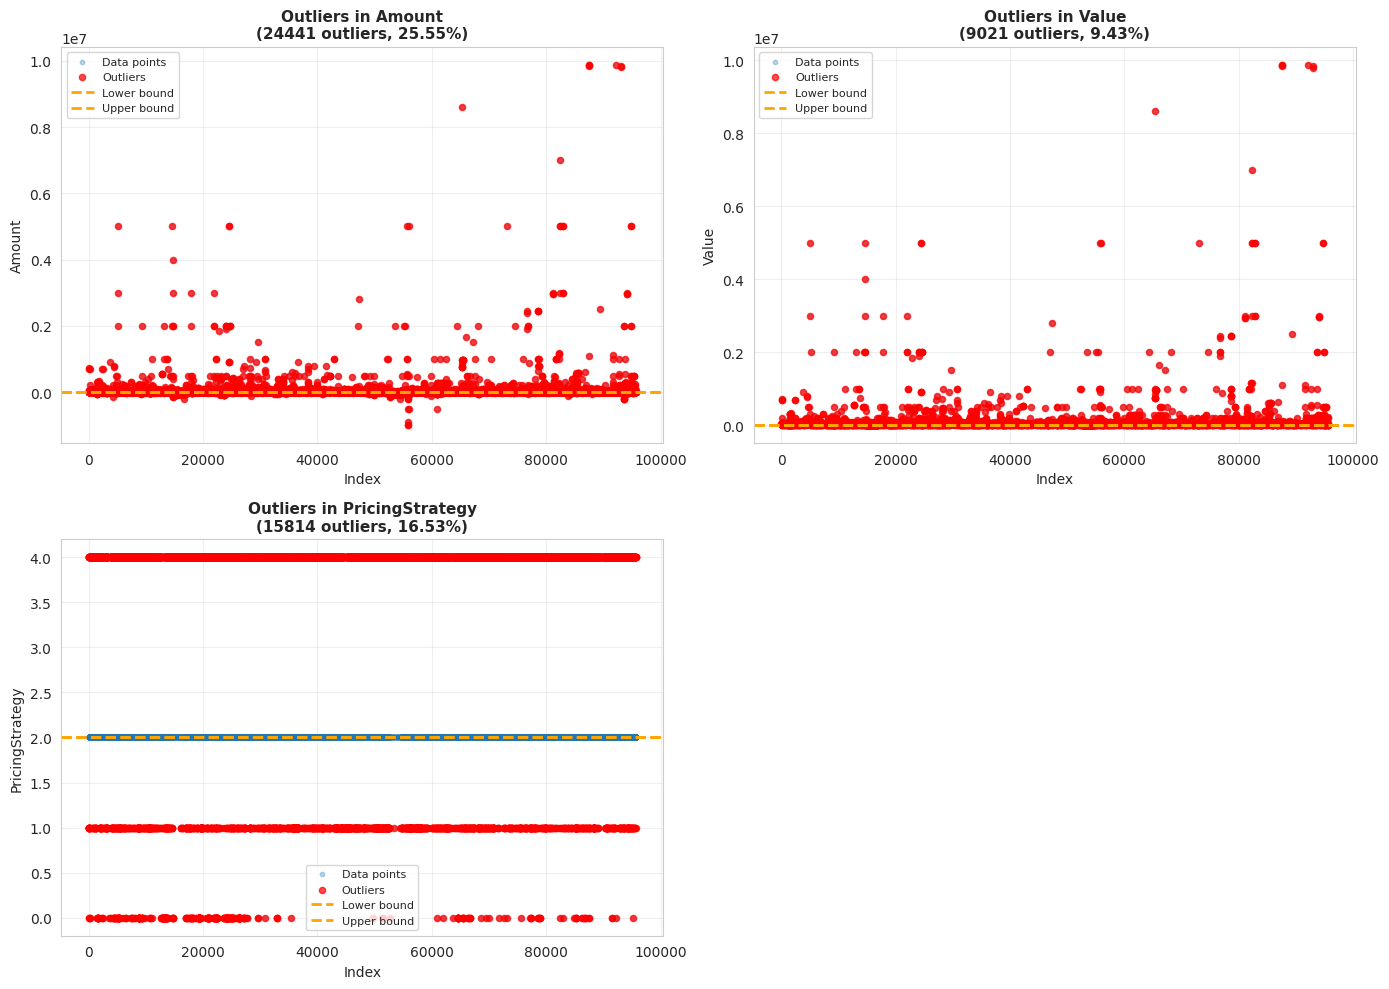

In [60]:
# Visualize outliers for features with significant outlier presence
print("=" * 100)
print("OUTLIER VISUALIZATION - FEATURES WITH HIGH OUTLIER PERCENTAGE")
print("=" * 100)

# Filter features with >5% outliers
high_outlier_features = outlier_df[outlier_df['Outlier Count'] > (len(df) * 0.05)]['Variable'].tolist()

if len(high_outlier_features) > 0:
    n_features = len(high_outlier_features)
    n_rows = (n_features + 1) // 2
    
    fig, axes = plt.subplots(n_rows, 2, figsize=(14, 5 * n_rows))
    if n_features == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for idx, col in enumerate(high_outlier_features):
        if idx < len(axes):
            ax = axes[idx]
            
            # Get outlier bounds
            row = outlier_df[outlier_df['Variable'] == col].iloc[0]
            lower_bound = row['Lower Bound']
            upper_bound = row['Upper Bound']
            
            # Plot data
            ax.scatter(range(len(df)), df[col], alpha=0.3, s=10, label='Data points')
            
            # Highlight outliers
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
            outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
            ax.scatter(outlier_indices, outliers, color='red', s=20, label='Outliers', alpha=0.7)
            
            # Add bounds lines
            ax.axhline(y=lower_bound, color='orange', linestyle='--', linewidth=2, label='Lower bound')
            ax.axhline(y=upper_bound, color='orange', linestyle='--', linewidth=2, label='Upper bound')
            
            ax.set_xlabel('Index', fontsize=10)
            ax.set_ylabel(col, fontsize=10)
            ax.set_title(f'Outliers in {col}\n({len(outliers)} outliers, {row["Outlier %"]})', 
                        fontsize=11, fontweight='bold')
            ax.legend(fontsize=8)
            ax.grid(True, alpha=0.3)
    
    # Hide empty subplots
    for idx in range(n_features, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No features with >5% outliers found.")


In [61]:
# Outlier treatment recommendations
print("=" * 100)
print("OUTLIER TREATMENT RECOMMENDATIONS")
print("=" * 100)

recommendations = []

for _, row in outlier_df.iterrows():
    col = row['Variable']
    outlier_pct = float(row['Outlier %'].replace('%', ''))
    
    # Determine recommendation based on outlier percentage
    if outlier_pct > 20:
        treatment = "Investigate data quality - high outlier percentage suggests data issues"
    elif outlier_pct > 10:
        treatment = "Consider capping/winsorizing or robust statistical methods"
    elif outlier_pct > 5:
        treatment = "Consider capping at bounds or using robust methods (median, IQR-based)"
    elif outlier_pct > 1:
        treatment = "May keep if legitimate values, or cap at bounds"
    else:
        treatment = "Likely legitimate outliers - keep or investigate individually"
    
    recommendations.append({
        'Variable': col,
        'Outlier %': row['Outlier %'],
        'Recommended Treatment': treatment
    })

rec_df = pd.DataFrame(recommendations)
print(rec_df.to_string(index=False))

print("\n\nGeneral Outlier Treatment Strategies:")
print("=" * 80)
print("""
1. **Keep Outliers** (if legitimate):
   - Domain knowledge confirms they're valid
   - Important for the analysis
   - Use robust methods (median, IQR) instead of mean/std

2. **Cap/Winsorize**:
   - Replace outliers with boundary values (Q1-1.5×IQR or Q3+1.5×IQR)
   - Preserves data while reducing extreme impact

3. **Remove Outliers**:
   - Only if clearly erroneous
   - Document removal criteria
   - Consider impact on sample size

4. **Transform Data**:
   - Log transformation for right-skewed data
   - Box-Cox transformation
   - Reduces impact of outliers

5. **Use Robust Methods**:
   - Median instead of mean
   - IQR instead of standard deviation
   - Robust regression methods
    """)


OUTLIER TREATMENT RECOMMENDATIONS
       Variable Outlier %                                                   Recommended Treatment
    CountryCode     0.00%           Likely legitimate outliers - keep or investigate individually
         Amount    25.55% Investigate data quality - high outlier percentage suggests data issues
          Value     9.43%  Consider capping at bounds or using robust methods (median, IQR-based)
PricingStrategy    16.53%              Consider capping/winsorizing or robust statistical methods
    FraudResult     0.20%           Likely legitimate outliers - keep or investigate individually


General Outlier Treatment Strategies:

1. **Keep Outliers** (if legitimate):
   - Domain knowledge confirms they're valid
   - Important for the analysis
   - Use robust methods (median, IQR) instead of mean/std

2. **Cap/Winsorize**:
   - Replace outliers with boundary values (Q1-1.5×IQR or Q3+1.5×IQR)
   - Preserves data while reducing extreme impact

3. **Remove Outliers

## Summary of Outlier Detection Analysis

### Key Findings:

1. **Box Plot Visualization**: 
   - Visual identification of outliers as points beyond whiskers
   - Shows quartiles, median, and IQR
   - Easy to spot extreme values

2. **IQR Method**:
   - Robust method using quartiles
   - Identifies values beyond Q1 - 1.5×IQR or Q3 + 1.5×IQR
   - Better for skewed distributions

3. **Z-Score Method**:
   - Uses mean and standard deviation
   - Identifies values beyond ±3 standard deviations
   - Assumes normal distribution

4. **Outlier Impact**:
   - Percentage of outliers per feature
   - Helps prioritize which features need treatment
   - High outlier percentage may indicate data quality issues

5. **Treatment Recommendations**:
   - Based on outlier percentage and data characteristics
   - Options: Keep, Cap, Remove, Transform, or Use Robust Methods
   - Consider domain knowledge and business context

### Next Steps:
- Decide on outlier treatment strategy based on analysis
- Implement treatment in data preprocessing
- Validate impact of outlier treatment on model performance


## Key Insights and Recommendations

Based on the comprehensive exploratory data analysis, here are the **top 5 most important insights** that will guide our feature engineering and model development:


### 1. Data Quality and Completeness

**Finding**: The dataset appears to be complete with no missing values detected across all features.

**Implication**: 
- No imputation strategies are needed, which simplifies the preprocessing pipeline
- However, we should verify if this is truly the case or if missing values are represented differently (e.g., as zeros, negative values, or special codes)
- This is particularly important for credit scoring where missing data might indicate information not available rather than true absence

**Action Items**:
- Validate data completeness with business stakeholders
- Check for implicit missing values (e.g., zeros that might represent missing data)
- Consider creating missing indicators if any implicit missing patterns are found


### 2. Strong Correlation Between Amount and Value Features

**Finding**: The Amount and Value features show very strong positive correlation (approximately 0.99), indicating near-perfect linear relationship.

**Implication**:
- These features are highly redundant and provide essentially the same information
- Including both in the model would introduce multicollinearity, which can:
  - Cause instability in linear models
  - Make coefficient interpretation difficult
  - Lead to overfitting
- For tree-based models, this redundancy wastes computational resources

**Action Items**:
- **Feature Selection**: Keep only one of these features (likely `Value` as it may represent the actual transaction value)
- **Feature Engineering**: Consider creating a ratio or difference feature if both contain unique information
- **Domain Validation**: Confirm with business if both features are necessary or if one is derived from the other


### 3. Significant Outlier Presence in Transaction Amounts

**Finding**: The Amount and Value features show high outlier percentages (approximately 25% and 9% respectively), with extreme values ranging from negative millions to positive millions.

**Implication**:
- Outliers can significantly impact model performance, especially for linear models
- The presence of negative values suggests refunds or reversals, which are important for credit risk assessment
- Extreme positive values might indicate:
  - Legitimate high-value transactions
  - Data quality issues
  - Fraudulent activities

**Action Items**:
- **Investigate Outliers**: Determine if extreme values are legitimate or data errors
- **Outlier Treatment**: 
  - For legitimate outliers: Use robust methods (median, IQR) or transformations (log, Box-Cox)
  - For erroneous values: Cap/winsorize at reasonable bounds
- **Feature Engineering**: 
  - Create indicator variables for refunds (negative amounts)
  - Consider creating binned/categorical versions of Amount/Value
  - Create features like "transaction_type" (positive/negative/zero)


### 4. High Cardinality in Customer and Transaction Identifiers

**Finding**: CustomerId, TransactionId, AccountId, and other ID fields have very high cardinality (thousands of unique values) with high entropy, indicating diverse customer base and transaction patterns.

**Implication**:
- Direct use of these IDs as features would lead to severe overfitting
- These identifiers cannot be used directly in models but contain valuable information
- The high diversity suggests we can create meaningful aggregated features

**Action Items**:
- **Feature Engineering**: Create aggregated features at customer/account level:
  - Transaction frequency per customer
  - Average transaction amount per customer
  - Customer lifetime value
  - Transaction patterns (RFM: Recency, Frequency, Monetary)
  - Account-level statistics
- **Target Variable Creation**: Use these aggregations to create the proxy "bad" customer label based on:
  - Payment behavior patterns
  - Transaction frequency trends
  - Amount patterns relative to customer history


### 5. Temporal Patterns and Transaction Distribution

**Finding**: The dataset spans approximately 90 days (Nov 2018 - Feb 2019) with transactions distributed across months, showing temporal patterns that could be important for credit risk assessment.

**Implication**:
- Time-based features can be highly predictive for credit risk
- Seasonal patterns, transaction recency, and frequency trends are important indicators
- The temporal dimension allows us to create time-based features for the proxy target variable

**Action Items**:
- **Temporal Feature Engineering**:
  - Days since last transaction (Recency)
  - Transaction frequency over time windows (Frequency)
  - Trend analysis (increasing/decreasing transaction amounts)
  - Time-based aggregations (transactions per week/month)
- **Target Variable Definition**: 
  - Use temporal patterns to identify "bad" customers:
    - Declining transaction frequency
    - Increasing transaction amounts (potential distress)
    - Irregular payment patterns
    - Long gaps between transactions
